In [124]:
import os
import sys
import numpy as np 
import pandas as pd
from subprocess import call
from scipy.stats import pearsonr
import urllib
import os, requests, zipfile#, StringIO
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
from sklearn import decomposition
sys.path.insert(0, '../')

In [10]:
def parse_raw_txt_pd(single_row):
    num_shares = single_row[0]
    week = int(single_row[1].split(':')[-1])
    features = []
    for i in range(2,len(single_row)):
        feat_i = float(single_row[i].split(':')[-1])
        features.append(feat_i)
    return num_shares, week, np.asarray(features)

In [140]:
def PCA_on_week(week_qid, week_feats_dict, week_ys_dict, return_X = False):
    
    np.random.seed(5)
    
    X = week_feats_dict[week_qid]
    y = week_ys_dict[week_qid]

    fig = plt.figure(1, figsize=(12, 9))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    pca = decomposition.PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    sorted_week = np.sort(y)
    X_remaining = X[np.where(y<=sorted_week[-10])]
    ax.scatter(X_remaining[:, 0], X_remaining[:, 1], X_remaining[:, 2], c = 'b',
               edgecolor='k', s= 100, label = 'Remaining Articles')
    X_top_10 = X[np.where(y>sorted_week[-10])]
    ax.scatter(X_top_10[:, 0], X_top_10[:, 1], X_top_10[:, 2],  c= 'r', s= 100, label = 'Top 10 articles')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.title('Week ' + str(week_qid), fontsize = 24)
    plt.legend(fontsize = 18)
    plt.show()
    if return_X:
        return X

In [141]:
training_data_fpath = '2019-741_Data/training_data.txt'

In [142]:
training_data_pd = pd.read_csv(training_data_fpath, sep=" ", header=None) 
training_data_pd

0        1             2              3               4   \
0       8400.0    qid:1   1:0.1904762  2:0.093344346  3:6.4657204E-4   
1       2000.0    qid:1  1:0.52380955  2:0.036228463    3:8.07117E-4   
2       1200.0    qid:1  1:0.33333334  2:0.054165684   3:7.273752E-4   
3       4200.0    qid:1  1:0.47619048   2:0.08803399  3:5.2222965E-4   
4       2200.0    qid:1  1:0.23809524  2:0.053339627  3:6.8005425E-4   
5       1700.0    qid:1  1:0.33333334  2:0.049681377   3:7.184223E-4   
6       1900.0    qid:1  1:0.42857143  2:0.051923532  3:7.8739366E-4   
7       1700.0    qid:1  1:0.42857143   2:0.06584848   3:7.571997E-4   
8        987.0    qid:1  1:0.33333334  2:0.021831485   3:9.694122E-4   
9       1400.0    qid:1  1:0.47619048   2:0.15116829  3:6.4946077E-4   
10      4800.0    qid:1  1:0.33333334  2:0.107977346  3:6.7512837E-4   
11       867.0    qid:1   1:0.2857143  2:0.009204626  3:0.0010790442   
12      1200.0    qid:1  1:0.52380955  2:0.033160254  3:8.8648935E-4   
13     26600.0    qid:1   1:0.2857143    2:0.2265754   3:5.126833E-4   
14      1900.0    qid:1  1:0.33333334   2:0.03587444   3:9.108616E-4   
15      2200.0    qid:1  1:0.47619048  2:0.065140426   3:7.277689E-4   
16      1100.0    qid:1  1:0.42857143    2:0.1117536   3:5.937461E-4   
17      2800.0    qid:1  1:0.33333334  2:0.027613878   3:9.022525E-4   
18       948.0    qid:1   1:0.3809524          2:0.0           3:0.0   
19      1700.0    qid:1  1:0.42857143  2:0.039768703  3:7.8459346E-4   
20      3700.0    qid:1   1:0.3809524   2:0.08036347   3:6.905378E-4   
21      2000.0    qid:1  1:0.52380955    2:0.0382346   3:7.470171E-4   
22     16000.0    qid:1   1:0.3809524   2:0.02808591    3:9.22271E-4   
23      1000.0    qid:1  1:0.33333334   2:0.06101015  3:8.4664195E-4   
24     16900.0    qid:2   1:0.5714286   2:0.09865471  3:6.8916404E-4   
25      9500.0    qid:2   1:0.5714286  2:0.089686096  3:7.0385734E-4   
26      1600.0    qid:2  1:0.42857143          2:0.0           3:0.0   
27      1900.0    qid:2  1:0.42857143   2:0.04189285  3:8.7063486E-4   
28      1100.0    qid:2  1:0.42857143    2:0.0411848  3:7.6245796E-4   
29      1400.0    qid:2   1:0.2857143  2:0.025371725  3:8.5736095E-4   
...        ...      ...           ...            ...             ...   
19975    777.0  qid:360  1:0.33333334   2:0.25395328   3:4.956933E-4   
19976   1900.0  qid:360   1:0.5714286     2:0.250059   3:5.485093E-4   
19977   1900.0  qid:360   1:0.5714286  2:0.023011565   3:9.330299E-4   
19978   3000.0  qid:360  1:0.42857143  2:0.045669105  3:7.3318975E-4   
19979  48000.0  qid:360  1:0.61904764   2:0.04732122  3:8.3913695E-4   
19980    485.0  qid:360  1:0.42857143   2:0.08886004   3:6.883409E-4   
19981   1200.0  qid:360   1:0.2857143  2:0.029029975   3:7.724465E-4   
19982    876.0  qid:360  1:0.33333334  2:0.036700495   3:8.301569E-4   
19983    919.0  qid:360  1:0.47619048    2:0.0853198   3:6.573238E-4   
19984   1000.0  qid:360   1:0.5714286   2:0.02749587   3:8.258873E-4   
19985    925.0  qid:360  1:0.52380955  2:0.014042955  3:0.0010549158   
19986   1600.0  qid:360  1:0.47619048  2:0.033278264   3:9.170571E-4   
19987   4700.0  qid:360  1:0.52380955   2:0.03351428  3:7.9703133E-4   
19988    847.0  qid:360  1:0.42857143    2:0.1235544   3:5.742111E-4   
19989   1600.0  qid:360  1:0.47619048  2:0.027613878  3:9.0161915E-4   
19990  27600.0  qid:360  1:0.47619048   2:0.06809063  3:7.6634093E-4   
19991   1800.0  qid:360  1:0.42857143  2:0.046849187   3:7.737746E-4   
19992   1400.0  qid:360   1:0.2857143  2:0.033160254  3:8.2848646E-4   
19993   1400.0  qid:360   1:0.3809524   2:0.05628983   3:7.516148E-4   
19994  15500.0  qid:360  1:0.47619048  2:0.025017701  3:8.7137945E-4   
19995   1100.0  qid:360  1:0.33333334  2:0.121548265  3:7.1398856E-4   
19996   4700.0  qid:360  1:0.23809524  2:0.027259855  3:0.0010344051   
19997   2400.0  qid:360  1:0.52380955    2:0.1190701  3:7.0233806E-4   
19998   1600.0  qid:360   1:0.1904762   2:0.04602313

In [143]:
len(training_data_pd)

20005

In [144]:
shares, week_id, X = parse_raw_txt_pd(training_data_pd.loc[0])

In [145]:
len(X)

58

In [146]:
Y_training = []
week_ids = []
X_training = []
for i in range(0, len(training_data_pd)):
    y_shares, week_id, x_feats = parse_raw_txt_pd(training_data_pd.loc[i])
    Y_training.append(y_shares)
    week_ids.append(week_id)
    X_training.append(x_feats)

In [147]:
X_training = np.asarray(X_training)
Y_training = np.asarray(Y_training)
week_ids = np.asarray(week_ids)

#X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X_training)
X_embedded.shape

np.save('X_tsne', X_embedded)

In [148]:
X_embedded = np.load('X_tsne.npy')

In [149]:
X_training.shape

(20005, 58)

In [150]:
Y_training.mean() + Y_training.std()

14817.959981496639

In [151]:
X_embedded_above_avg = X_embedded[np.where(Y_training > (Y_training.mean() + Y_training.std()) )]
X_embedded_below_avg = X_embedded[np.where(Y_training < Y_training.mean())]

In [157]:
np.unique(week_ids)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [104]:
print('X min, max: ',X_training.min(), X_training.max())
print('Y min, max: ',Y_training.min(), Y_training.max())

X min, max:  0.0 1.0
Y min, max:  1.0 663600.0


In [105]:
print('Number of weeks :', week_ids.max())

Number of weeks : 360


In [106]:
# Store attributes in a dictionary where keys correspond to qid (week)

In [156]:
week_feats = {}
week_ys = {}
for week in range(1, week_ids.max()+1):
    X_week = X_training[np.where(week_ids == week)]
    Y_training_week = Y_training[np.where(week_ids == week)]
    week_feats[week] = X_week
    week_ys[week] =  Y_training_week

In [107]:
# T-SNE embeddings per week

/rcg/software/Linux/Ubuntu/16.04/amd64/LANG/PYTHON/3.5.2-SYSTEM/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


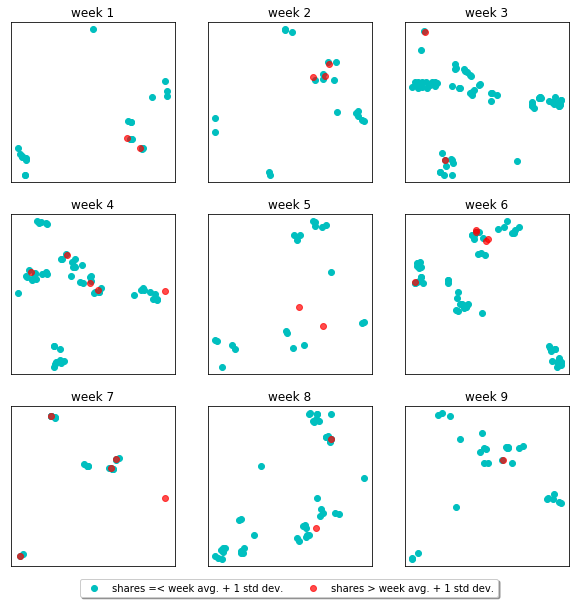

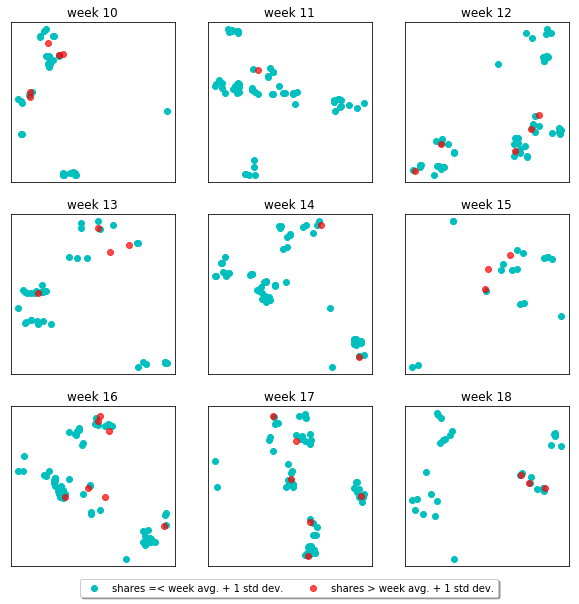

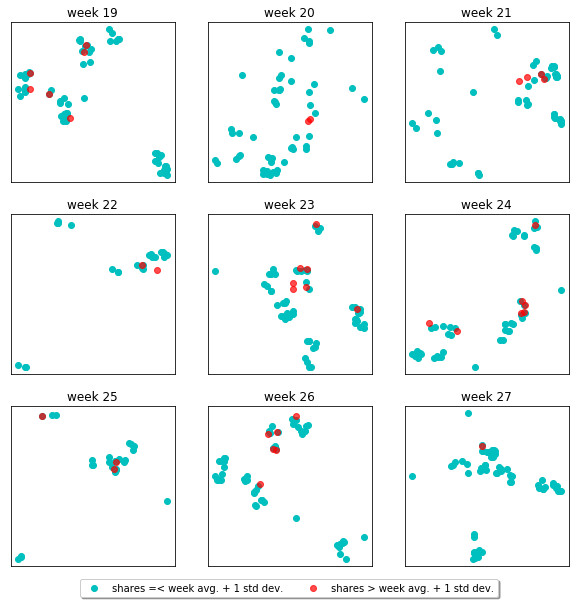

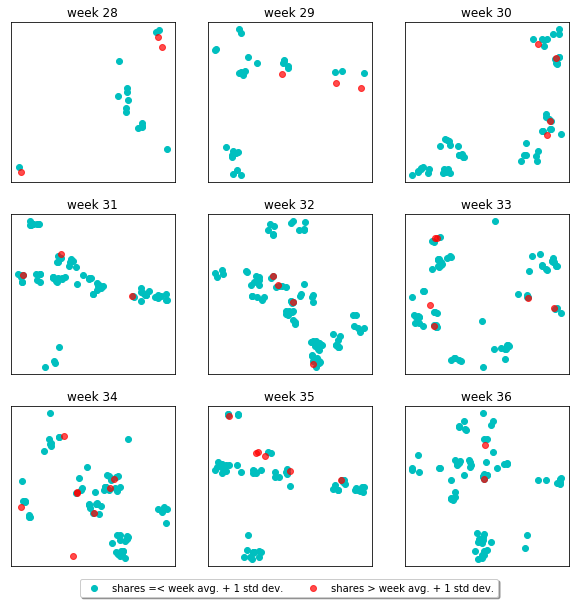

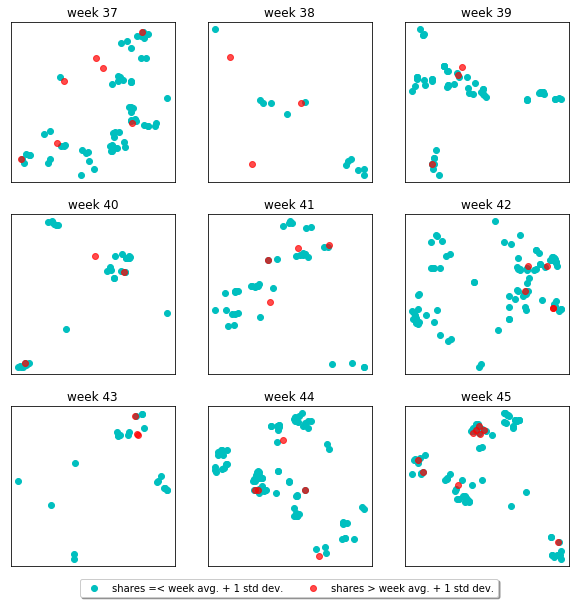

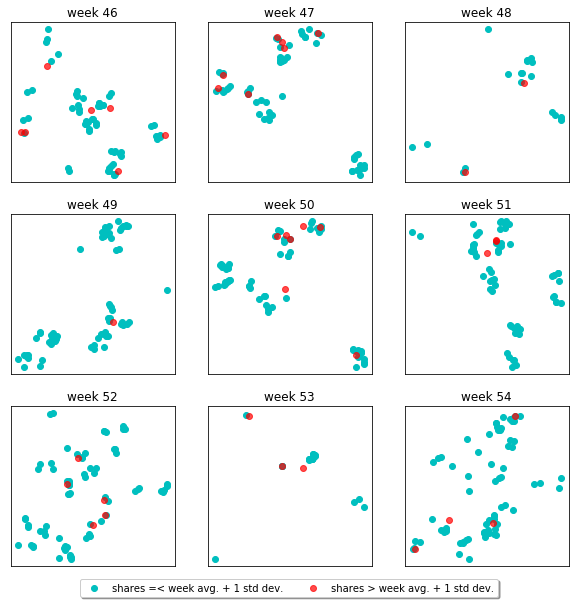

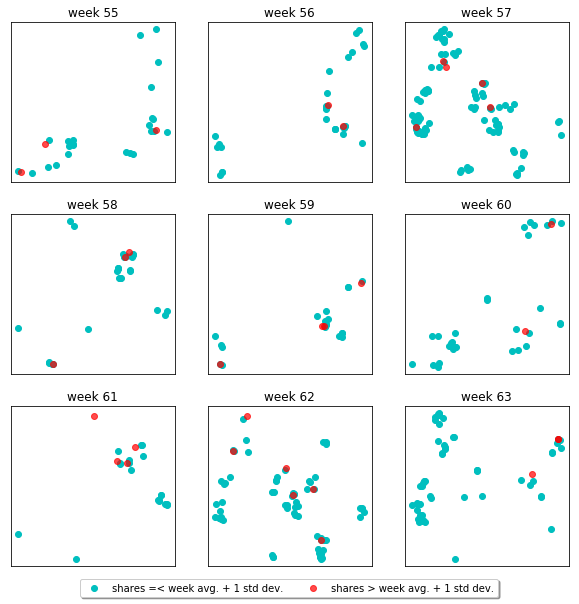

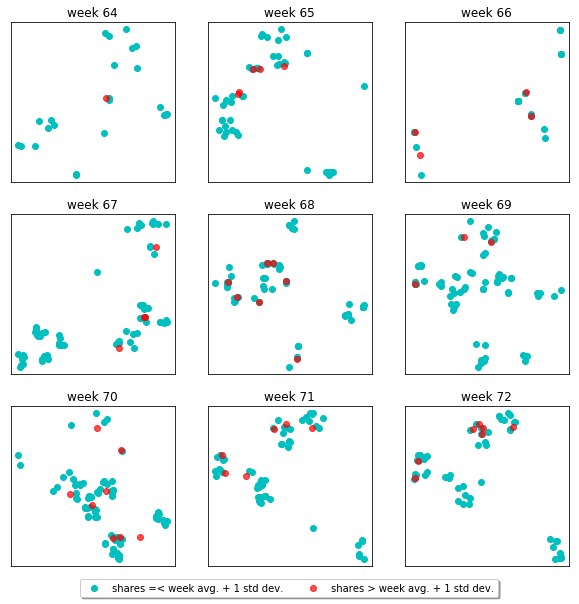

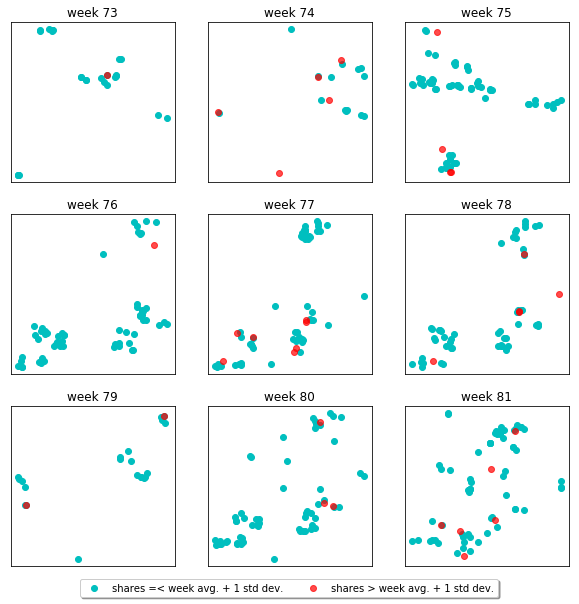

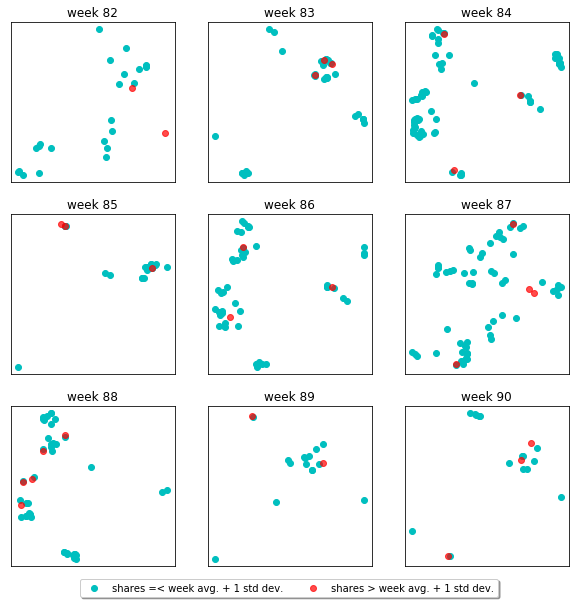

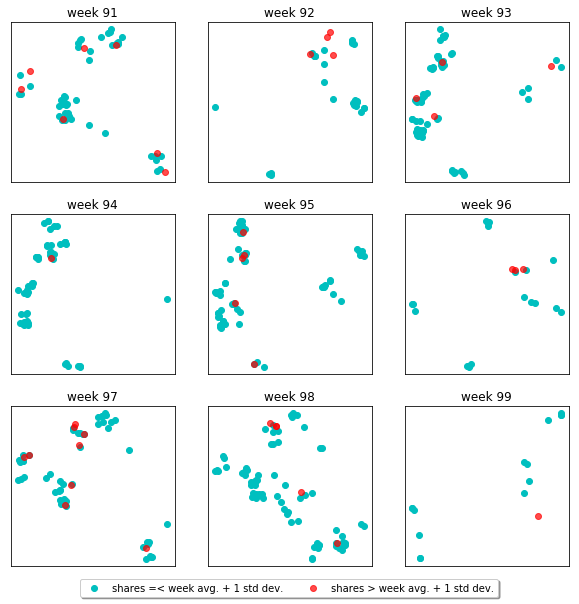

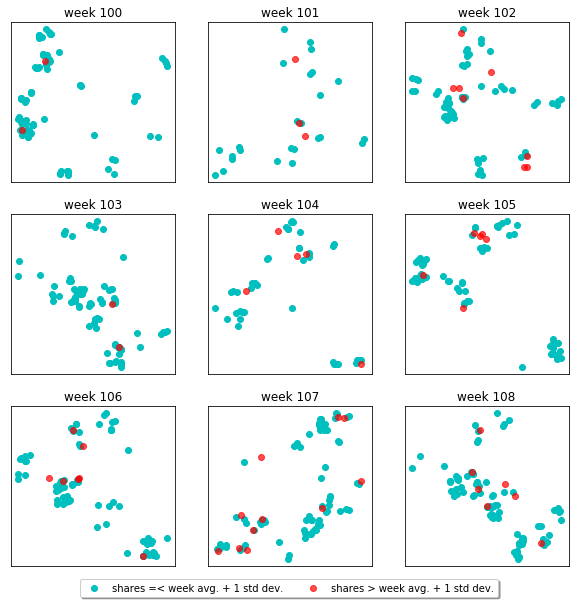

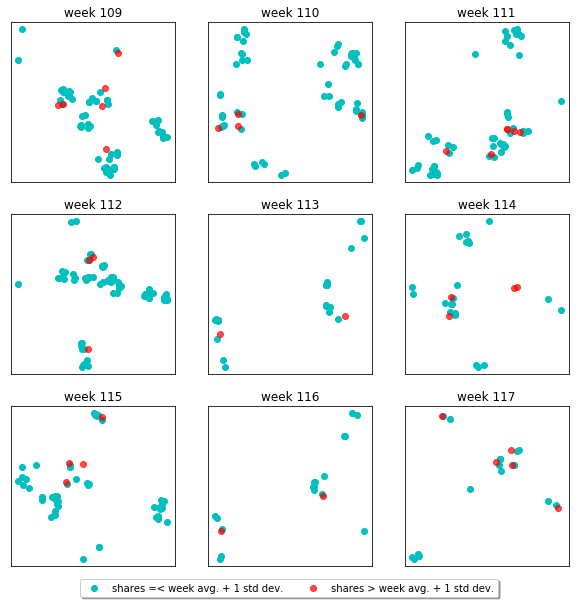

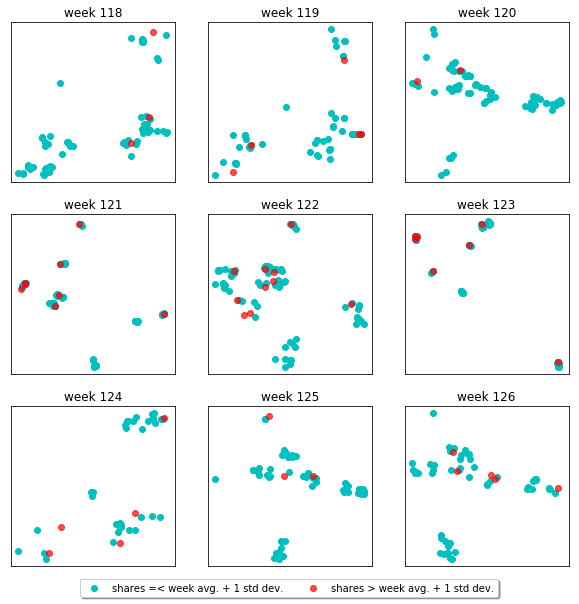

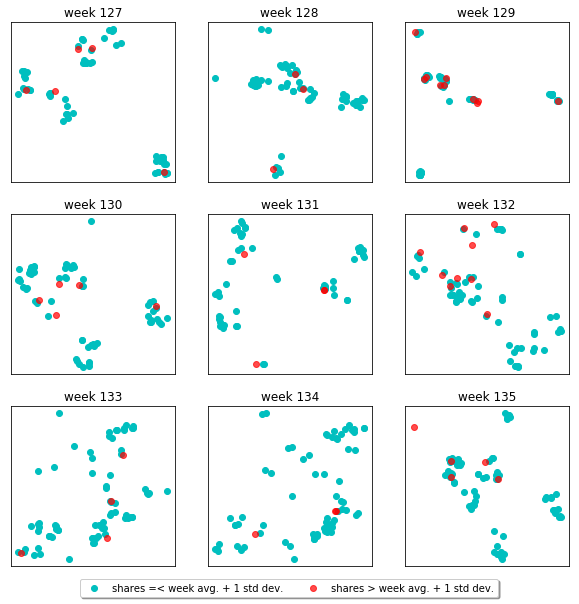

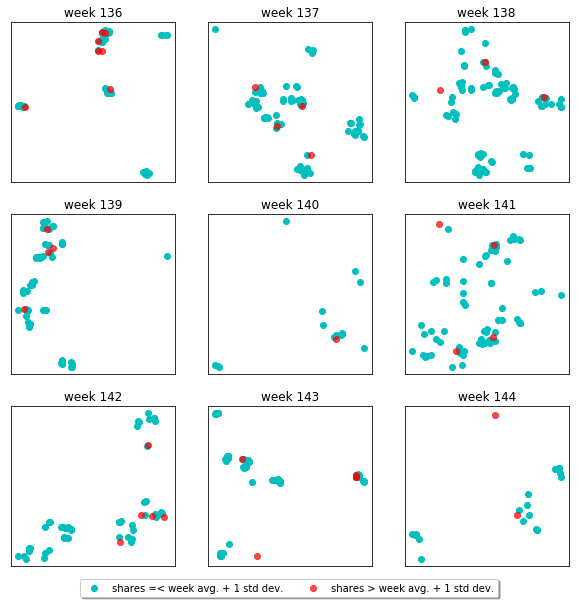

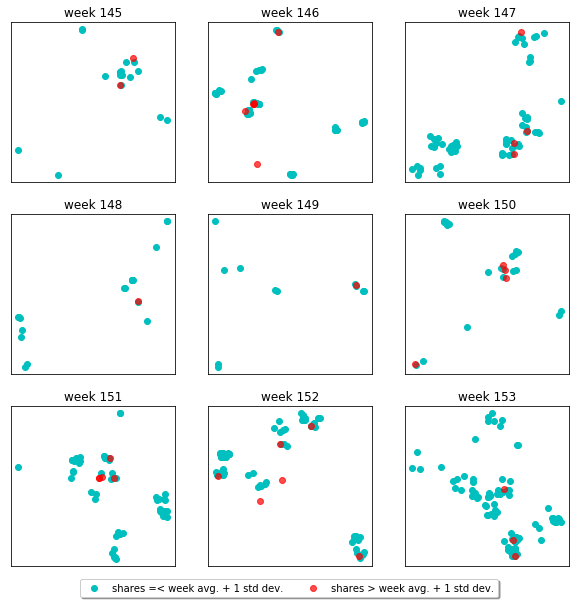

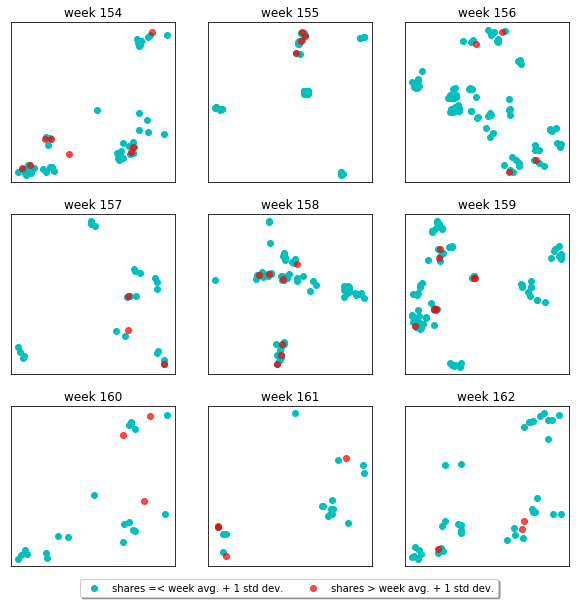

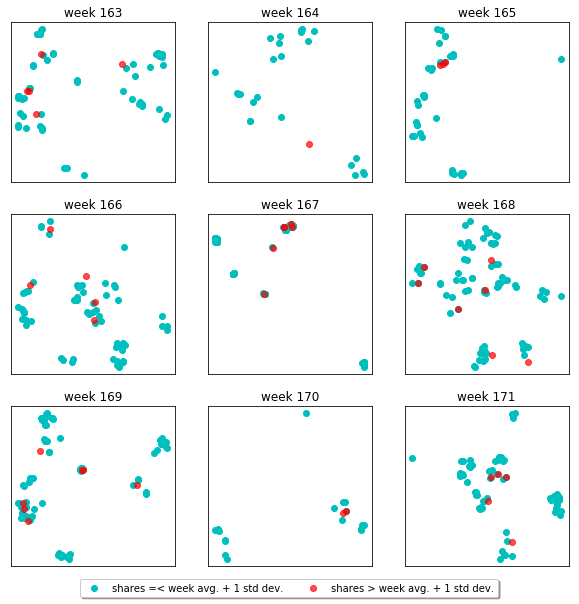

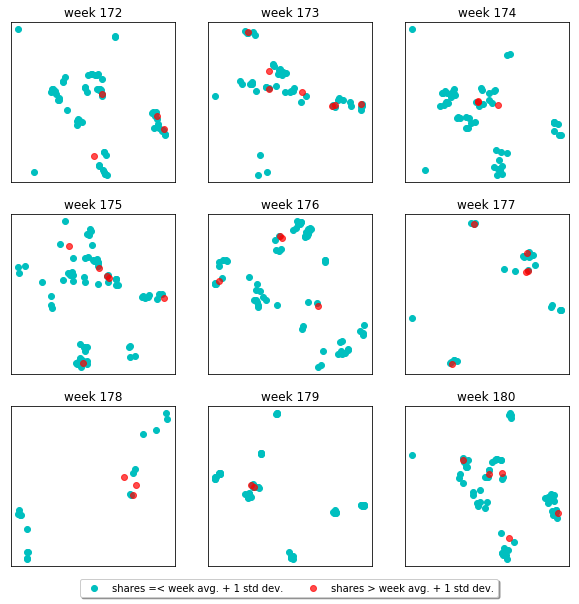

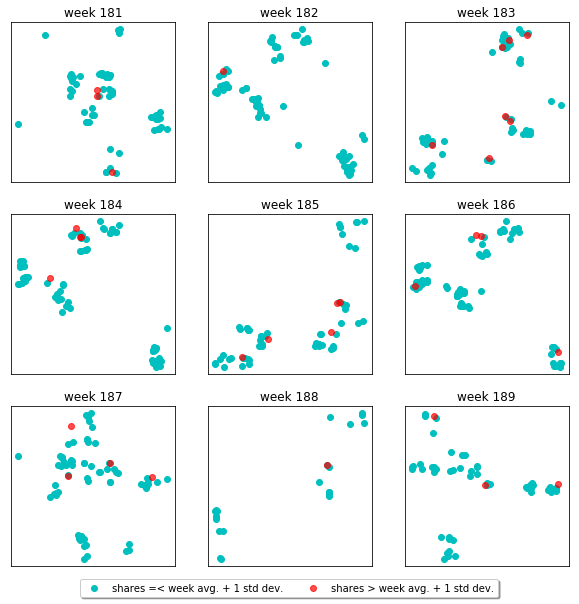

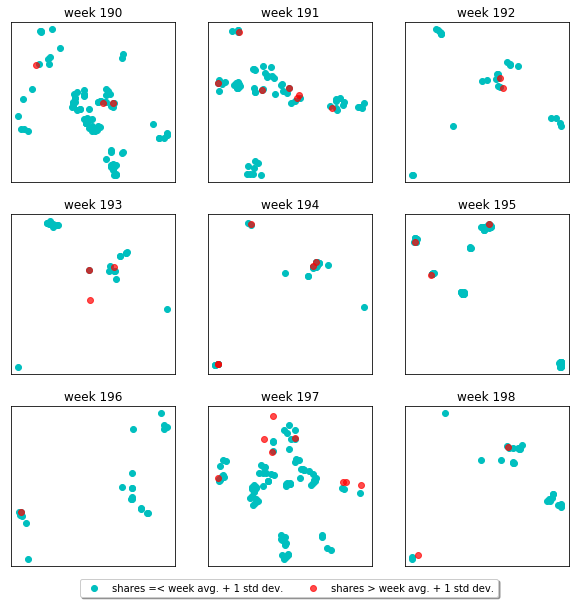

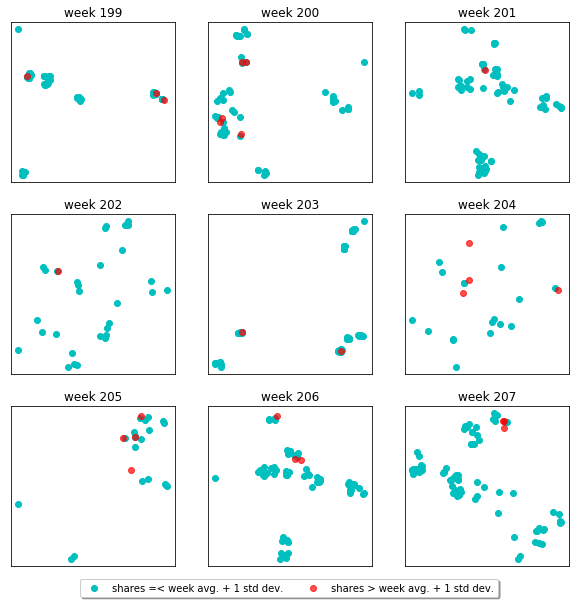

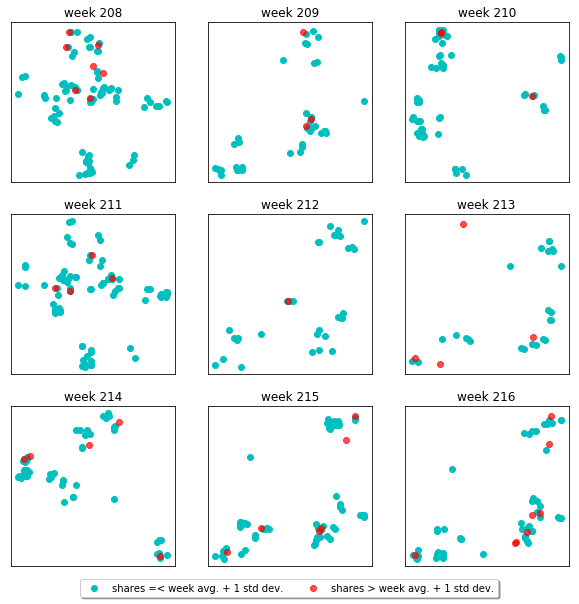

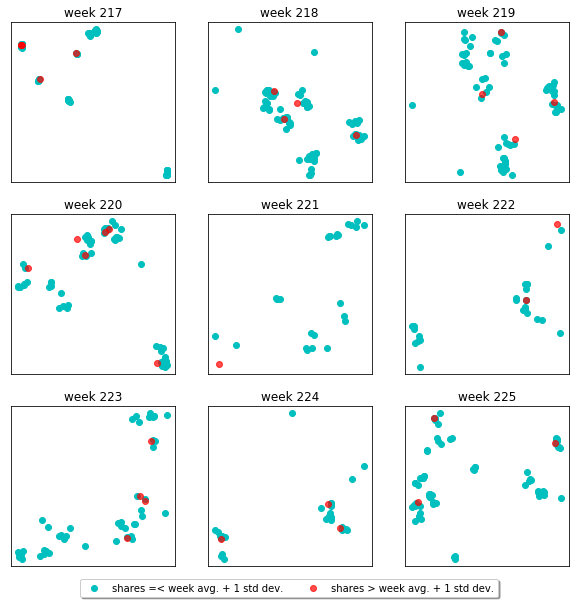

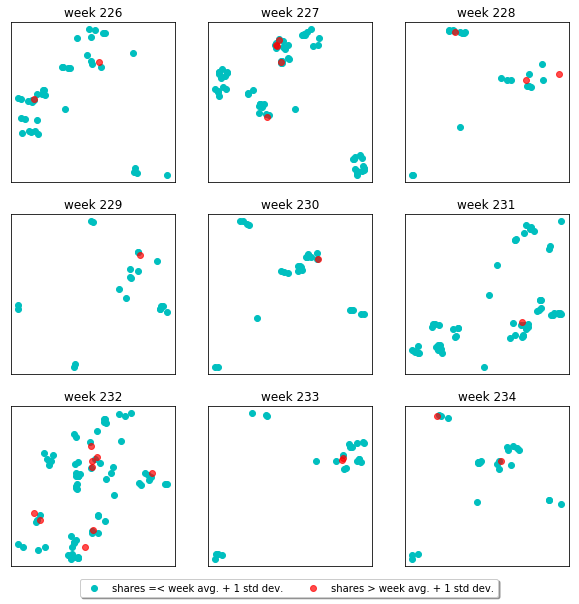

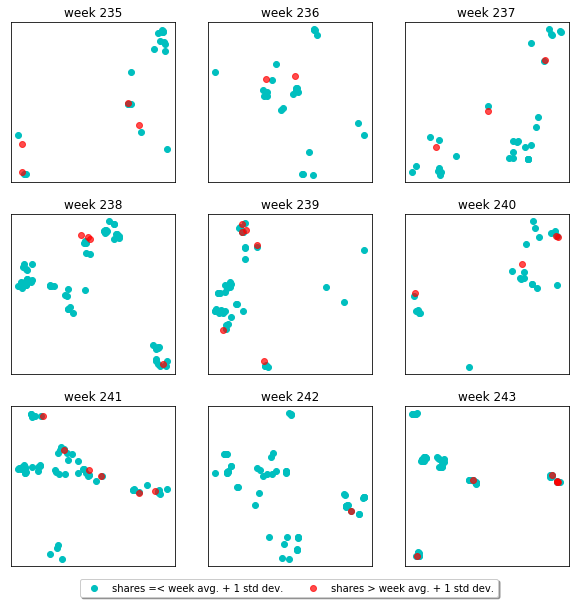

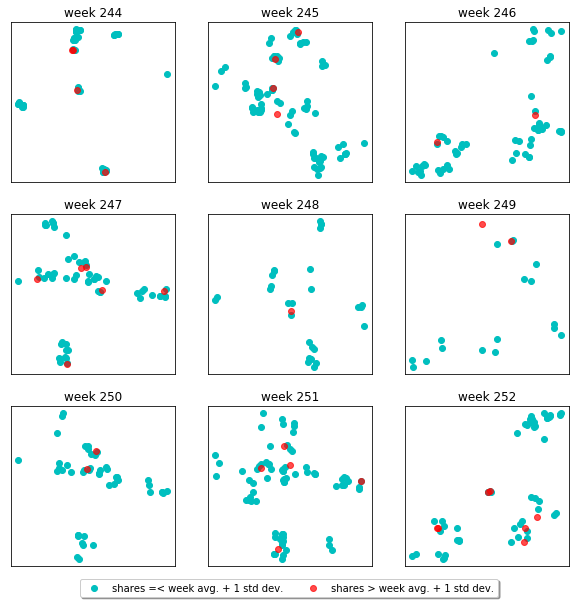

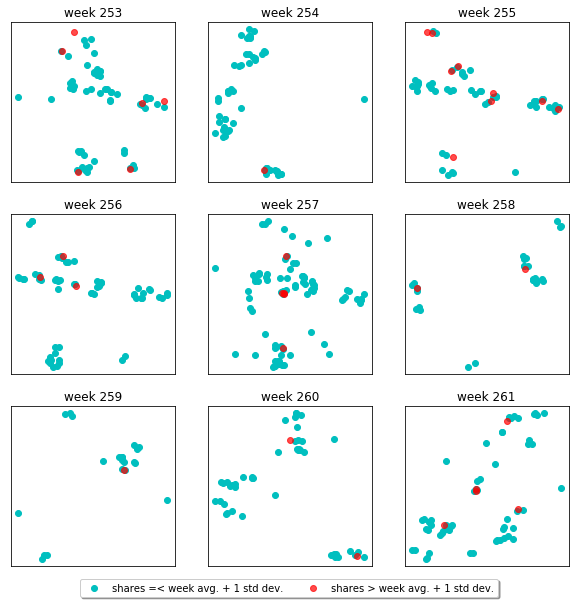

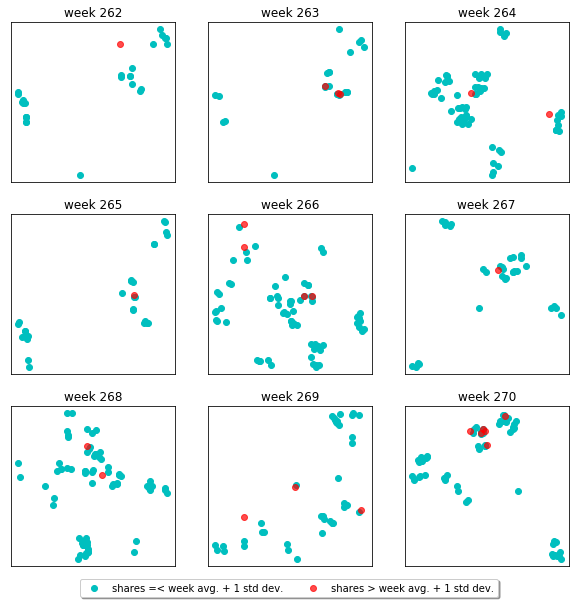

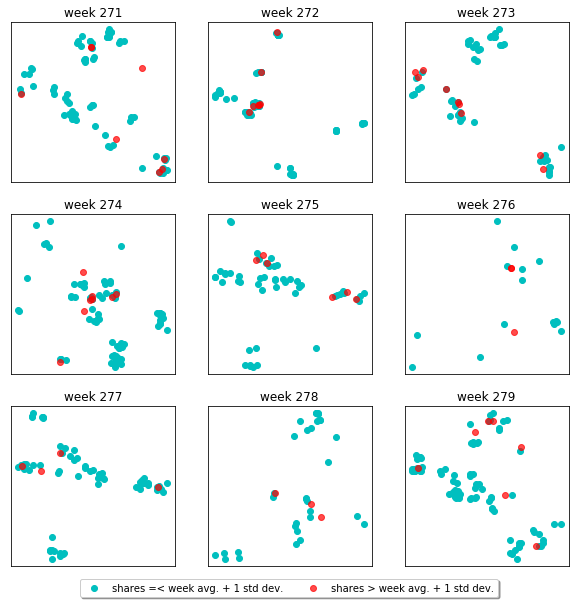

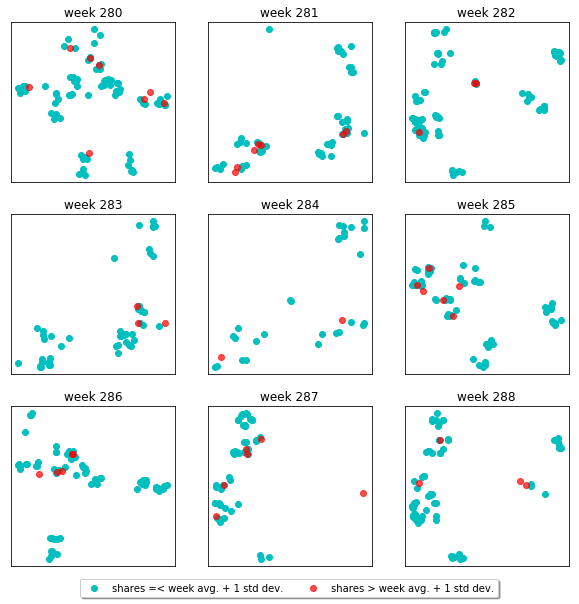

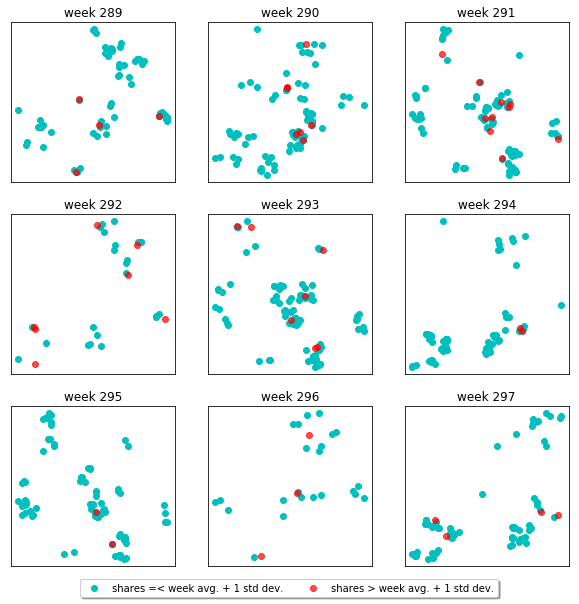

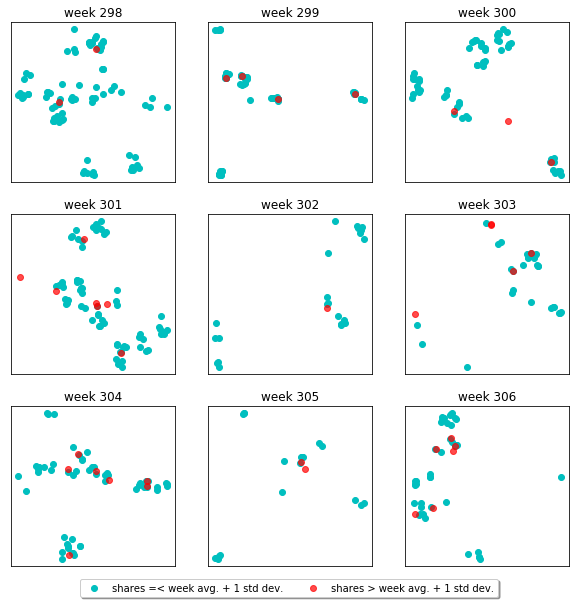

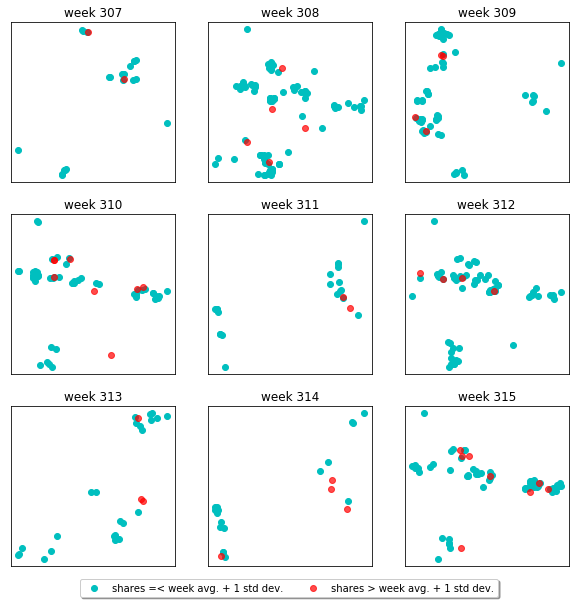

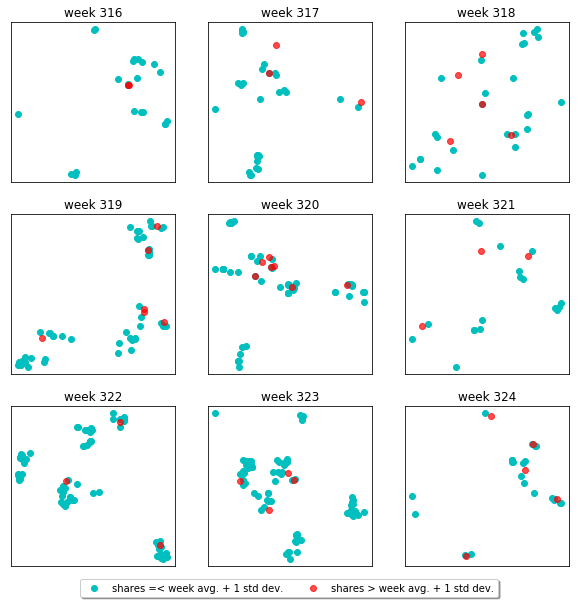

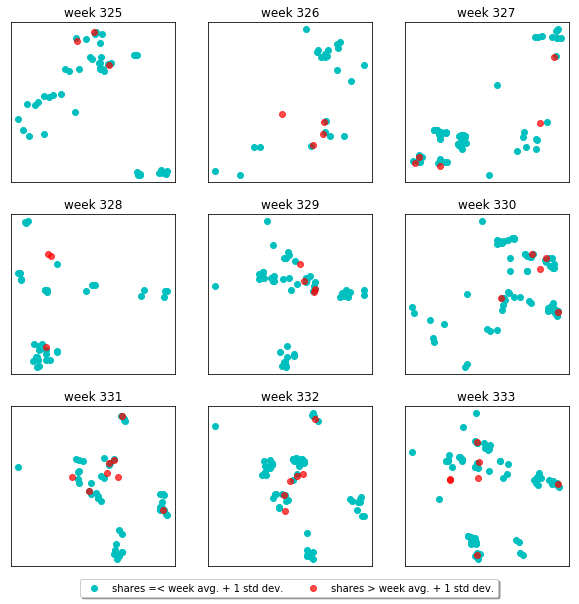

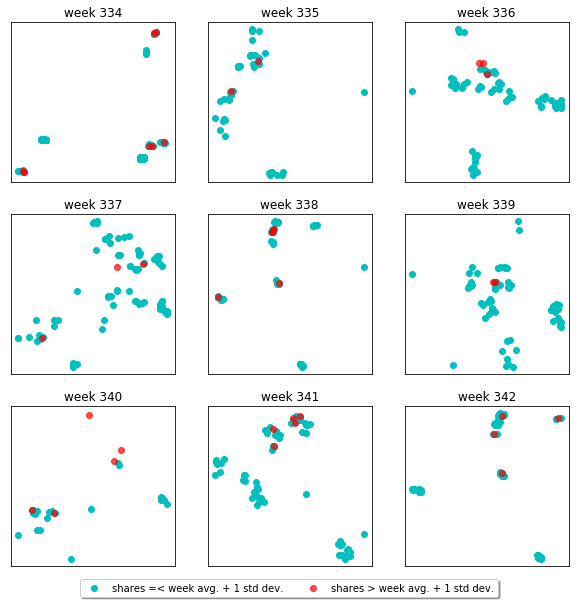

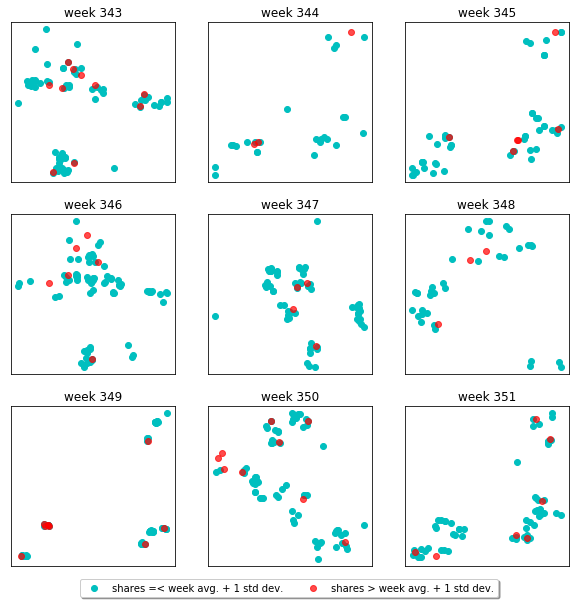

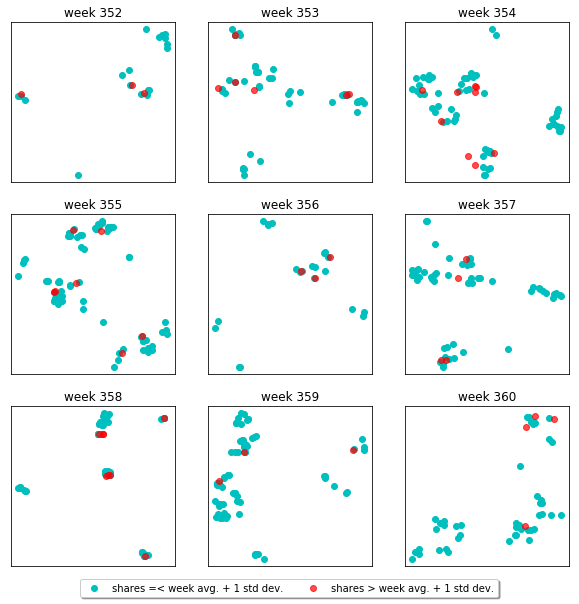

In [115]:
week =1
for i in range(0, 40):
    plt.figure(figsize=(10,10)) 
    #plt.title('TSNE embeddings')
    for j in range(1,10):
        plt.subplot(3,3,j)
        plt.title('week ' + str(week))
        X_emd_week = X_embedded[np.where(week_ids == week)]
        Y_training_week = Y_training[np.where(week_ids == week)]
        X_embedded_above_avg = X_emd_week[np.where(Y_training_week > (Y_training_week.mean() + Y_training_week.std()) )]
        X_embedded_below_avg = X_emd_week[np.where(Y_training_week <= (Y_training_week.mean() + Y_training_week.std()) )]
        #plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha = 1)#cmap=plt.cm.rainbow)
        plt.scatter(X_embedded_below_avg[:,0], X_embedded_below_avg[:,1], c='c', alpha=1, label = 'shares =< week avg. + 1 std dev.')
        plt.scatter(X_embedded_above_avg[:,0], X_embedded_above_avg[:,1], c='r', alpha=0.7, label='shares > week avg. + 1 std dev.')
        plt.xticks([])
        plt.yticks([])
        week = week + 1
        
    plt.legend(ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(0.6, -0.05)) 
#     plt.savefig('weeks_'+str(week-9)+'-'+str(week-1))

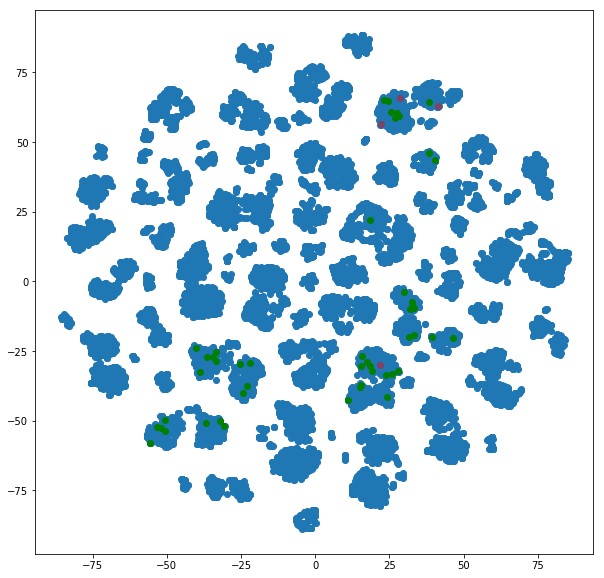

In [116]:
# T-SNE, entire data set  (ignoring qid)
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha = 1)#cmap=plt.cm.rainbow)
plt.scatter(X_embedded_below_avg[:,0], X_embedded_below_avg[:,1], c='g', alpha=1)
plt.scatter(X_embedded_above_avg[:,0], X_embedded_above_avg[:,1], c='r', alpha=0.4)

In [121]:
len(week_feats[8])

50

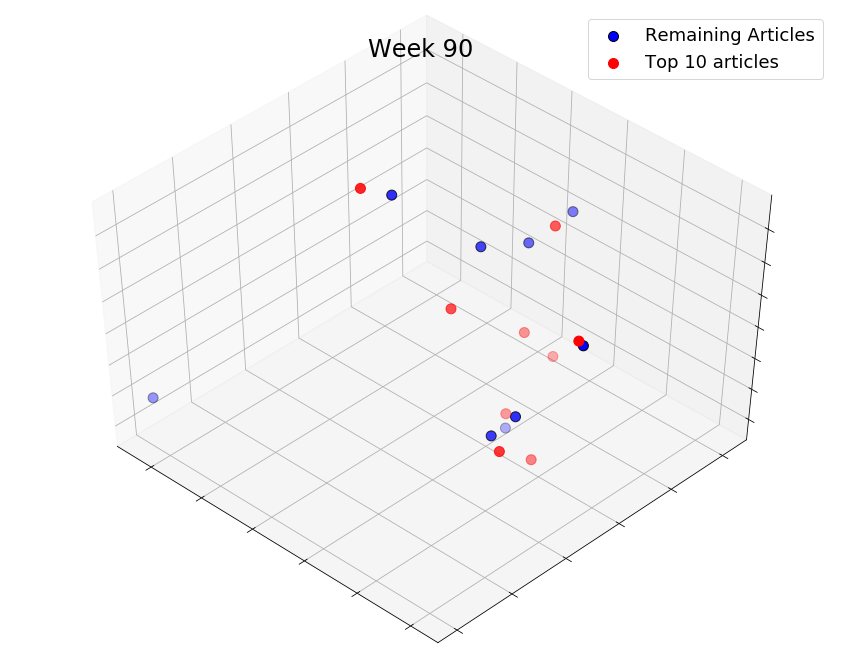

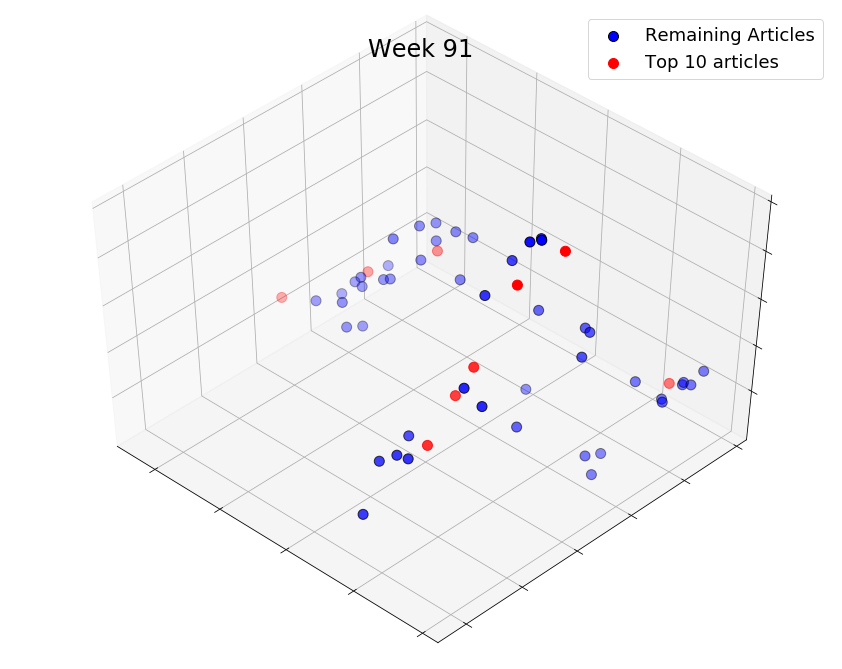

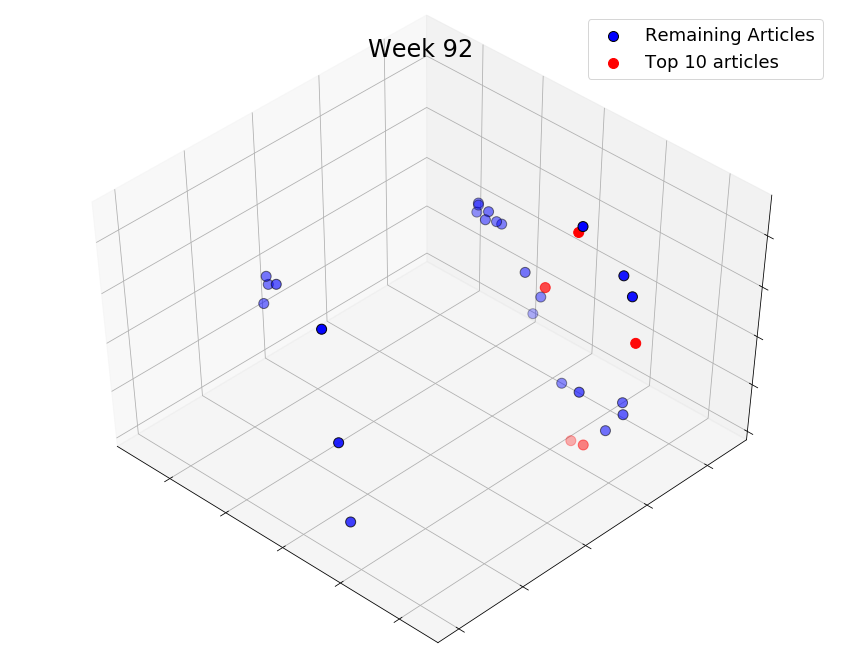

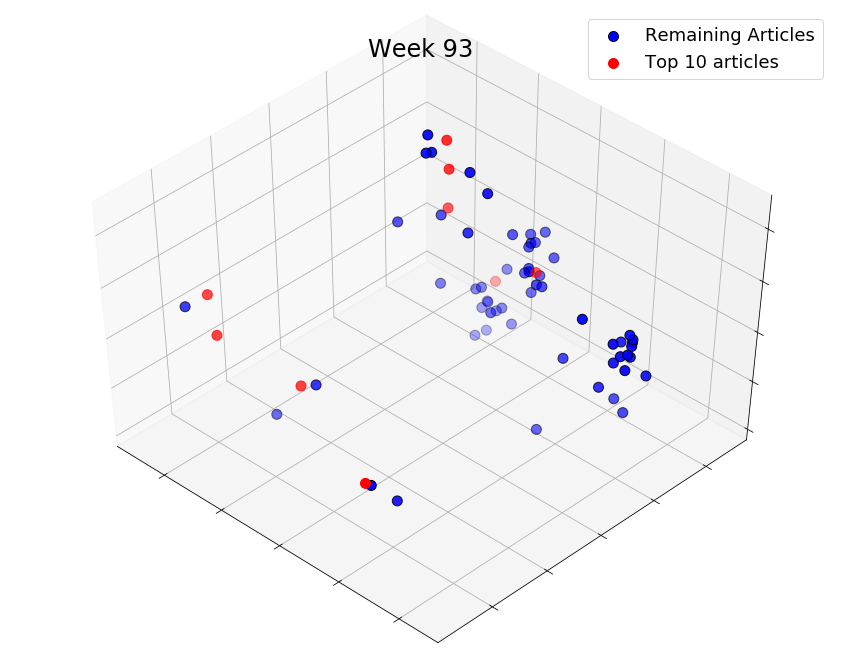

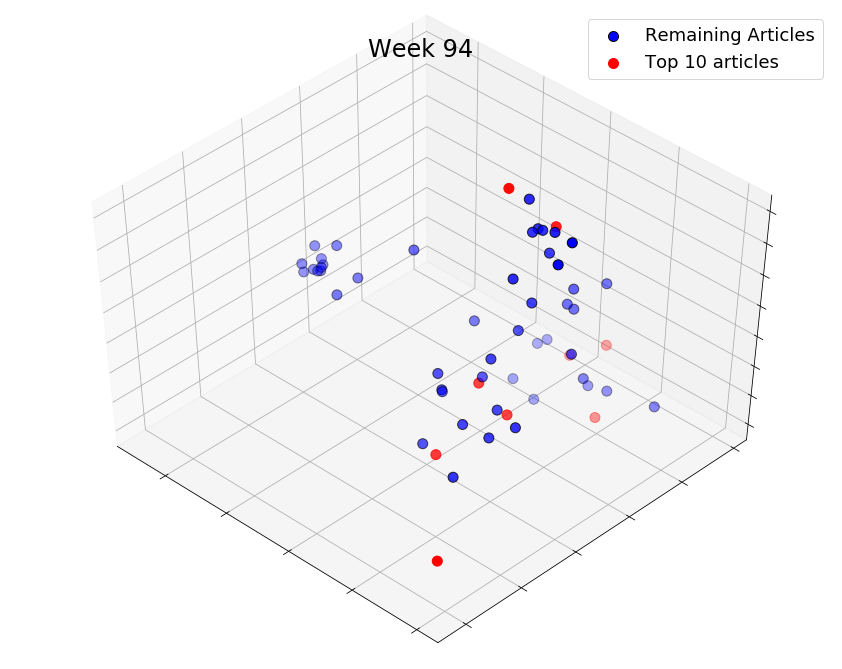

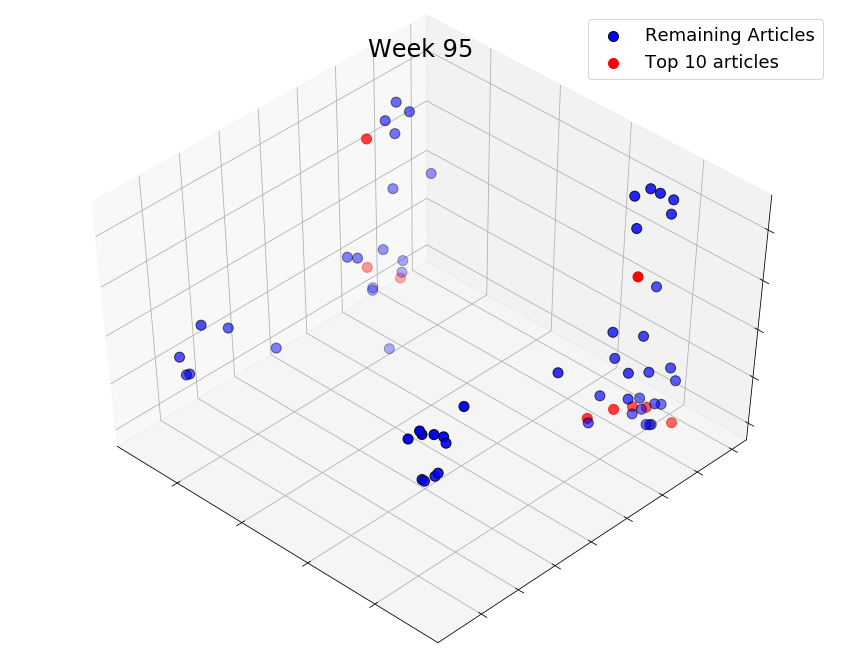

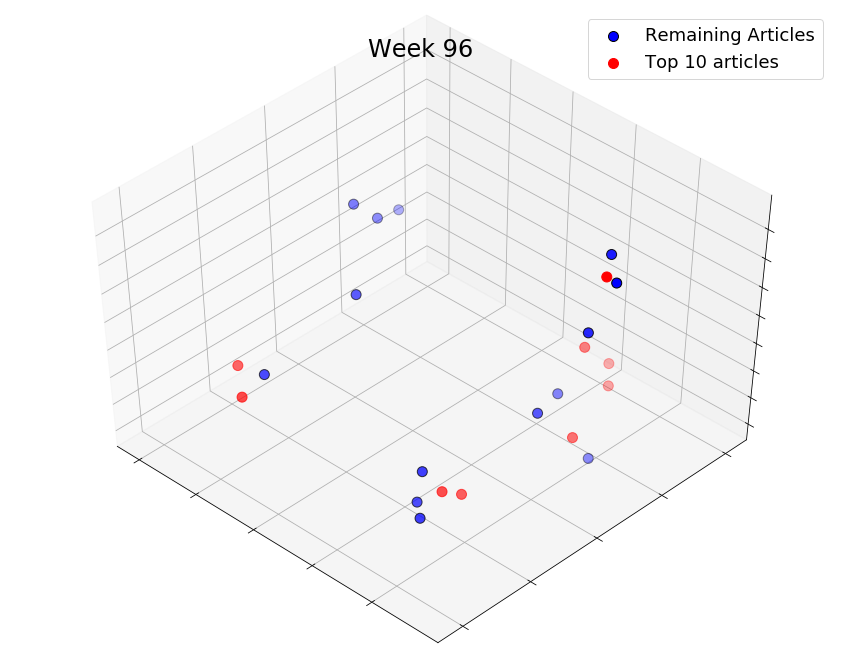

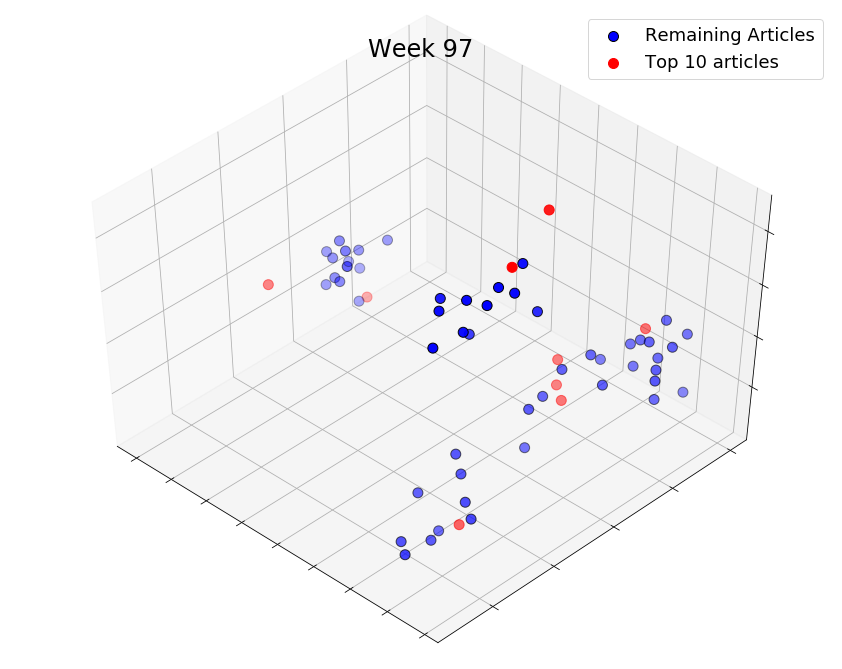

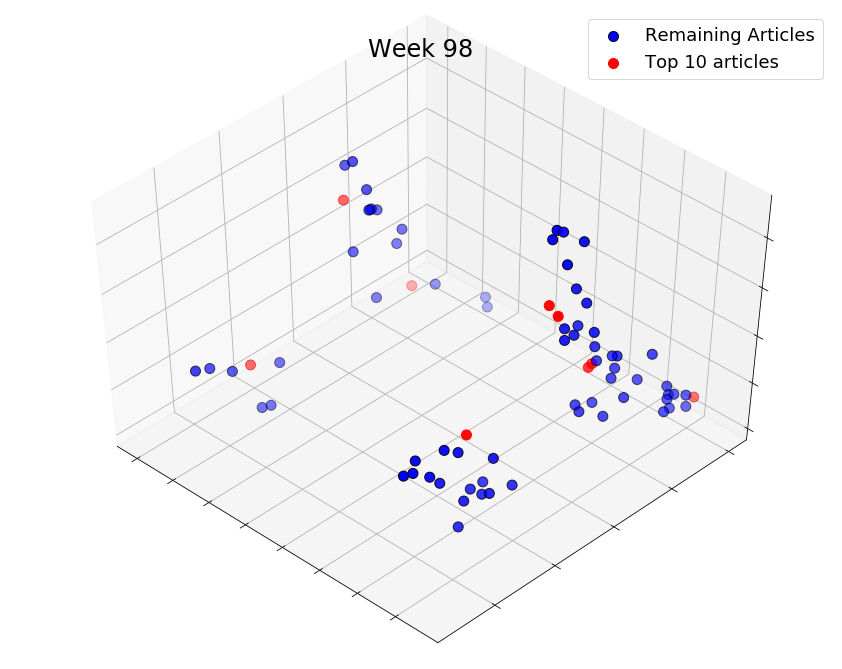

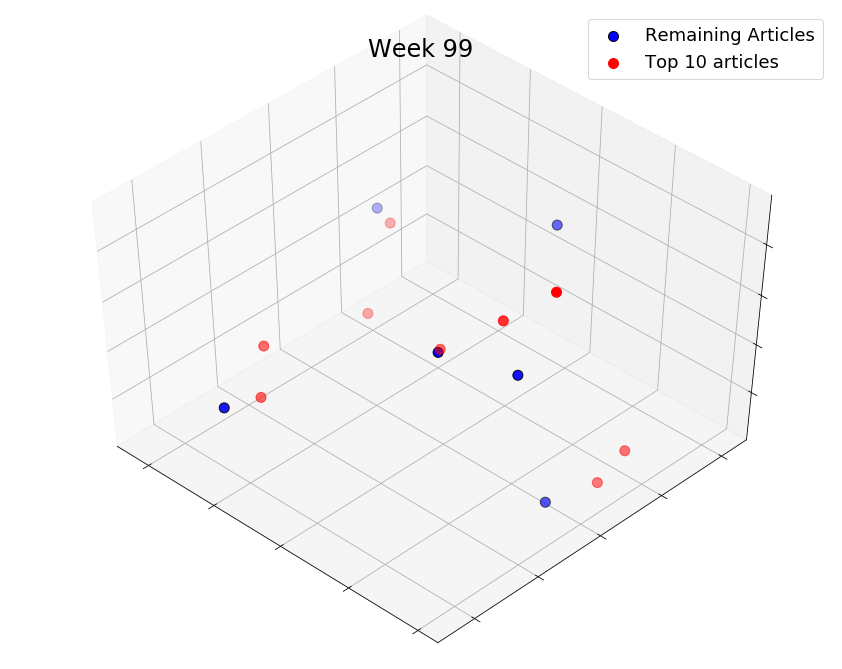

In [119]:
for i in range(90,100):
    PCA_on_week(i, week_feats, week_ys)

In [122]:
# correlation between top 5, 10, 15 and features

In [125]:
?pearsonr

In [127]:
x.shape

(58,)

In [129]:
X_week.shape

(24, 58)

In [128]:
y_week.shape

(24,)

In [154]:
len(Y_training)

20005

In [158]:
week_ids.max()

360

In [286]:
neg_sig_feats = []
pos_sig_feats = []
# find significant features across weeks
for week in range(1, week_ids.max()+1):
    # collect features and shares for a given week
    X_week = week_feats[week]
    y_week = week_ys[week]
    # set
    pos_count = 0
    neg_count = 0
    for x in np.transpose(X_week):
        r, p = pearsonr(y_week, x)
        if p <0.05 and r>0.3:
            print(r,p, 'week qid:', week, ' feat num: ', count)
            pos_sig_feats.append(pos_count)        
        elif p<0.5 and r<-0.3:
            pos_count = pos_count +1
            print(r,p, 'week qid:', week, ' feat num: ', count)
            neg_sig_feats.append(neg_count)
            neg_count = neg_count +1
    
        

0.6045059457380237 0.0017551075511759474 week qid: 1  feat num:  59
0.45650652873522063 0.02493910867691918 week qid: 1  feat num:  59
0.41578795081140146 0.04330620806278483 week qid: 1  feat num:  59
-0.39404851949040015 0.05674190316648898 week qid: 1  feat num:  59
-0.4418771985718437 0.03062827993076375 week qid: 1  feat num:  59
0.5193782159896626 0.013242661424168661 week qid: 2  feat num:  59
-0.340786661660603 0.12066024564364315 week qid: 2  feat num:  59
0.6422504136472609 0.00126954179281596 week qid: 2  feat num:  59
0.510330881278246 0.015237503064394949 week qid: 2  feat num:  59
-0.37729495535487634 0.08344967346831564 week qid: 2  feat num:  59
0.5723034764444163 0.005381167471676481 week qid: 2  feat num:  59
0.6499236971190435 2.803521275608134e-10 week qid: 3  feat num:  59
0.4396238396534797 7.938997184055651e-05 week qid: 3  feat num:  59
0.3879802567733344 0.0005831156488329357 week qid: 3  feat num:  59
0.5263973926832781 0.011846223857819149 week qid: 5  feat n

0.6037056990090511 0.0006704528549439497 week qid: 85  feat num:  59
-0.35889882857887856 0.06071495676679556 week qid: 85  feat num:  59
0.6531643373314787 8.630454876609346e-08 week qid: 86  feat num:  59
-0.3026840038229295 0.02610206412598444 week qid: 86  feat num:  59
-0.38777930430560364 0.0037649931233102694 week qid: 86  feat num:  59
-0.35196632473767897 0.009054447805078757 week qid: 86  feat num:  59
-0.3468282388679913 0.01018998729559989 week qid: 86  feat num:  59
0.36226788418984307 0.0032646865064617486 week qid: 87  feat num:  59
0.4603298036055268 0.0009943020652532133 week qid: 88  feat num:  59
0.5636670485970026 3.024273013954026e-05 week qid: 88  feat num:  59
-0.31458798672945343 0.21877032700526094 week qid: 89  feat num:  59
-0.4965335067313678 0.04261733160825523 week qid: 89  feat num:  59
-0.30648327020898264 0.23151233528304446 week qid: 89  feat num:  59
0.4894280553272674 0.04615237971740399 week qid: 89  feat num:  59
-0.33892144781513167 0.168877125335

0.4685449654517602 4.300617347452523e-05 week qid: 176  feat num:  59
0.38614399188471576 0.0009613573357341632 week qid: 176  feat num:  59
0.4848427775277768 2.1051188639399036e-05 week qid: 176  feat num:  59
0.517702844041656 4.440975013567222e-06 week qid: 176  feat num:  59
0.6644008881363871 3.587587867498492e-10 week qid: 176  feat num:  59
0.6318115371679626 4.4850995160516586e-09 week qid: 176  feat num:  59
0.6727420185128236 1.7859947430720845e-10 week qid: 176  feat num:  59
0.38793681570796223 0.028241081723688593 week qid: 177  feat num:  59
0.36387529911502553 0.040630924909769904 week qid: 177  feat num:  59
0.4069511762016524 0.02080315063011952 week qid: 177  feat num:  59
0.37548975275831104 0.034194610256499766 week qid: 177  feat num:  59
0.4406785861107515 0.011590884138007785 week qid: 177  feat num:  59
0.48260665840566164 0.005150065987223057 week qid: 177  feat num:  59
0.44380705649109975 0.010946689875033517 week qid: 177  feat num:  59
0.46902097091212386 

0.5200854024048425 0.002280061042351551 week qid: 267  feat num:  59
0.5999536212002743 0.0002840019311706313 week qid: 267  feat num:  59
-0.33484135595875114 0.061030713198061845 week qid: 267  feat num:  59
0.3913096143044614 0.02678284367563052 week qid: 267  feat num:  59
0.38038523332109514 0.031742079937667686 week qid: 267  feat num:  59
0.36621843122282477 0.0014403384613366817 week qid: 268  feat num:  59
0.437181758913334 0.0037915018607083493 week qid: 269  feat num:  59
0.31009830803798427 0.04565297488542335 week qid: 269  feat num:  59
0.33420453812438605 0.03052924596527117 week qid: 269  feat num:  59
0.3459680538293877 0.0047590979414547235 week qid: 270  feat num:  59
0.4018117961367426 0.0009077270571007039 week qid: 270  feat num:  59
0.3173956000100623 0.009987515813082775 week qid: 270  feat num:  59
0.42054418372725844 0.00048666441742264976 week qid: 270  feat num:  59
-0.3221634199197269 0.01134061428021206 week qid: 273  feat num:  59
-0.3169273320066068 0.01

-0.3973061687978601 0.0003161176023766614 week qid: 359  feat num:  59
-0.5579694686137229 1.1126433108618851e-07 week qid: 359  feat num:  59
-0.45993194708265267 2.271596820362096e-05 week qid: 359  feat num:  59
0.3972807581118511 0.0003164234430728389 week qid: 359  feat num:  59
-0.5347079719610002 4.587532743159406e-07 week qid: 359  feat num:  59
0.3185562673052558 0.0044769518882195455 week qid: 359  feat num:  59
-0.3002666609084122 0.007562458693380409 week qid: 359  feat num:  59
-0.3636429097955579 0.006873546416187533 week qid: 360  feat num:  59
0.36177556377867426 0.00718804745229929 week qid: 360  feat num:  59
0.4081987979024617 0.002183044903644733 week qid: 360  feat num:  59


In [290]:
import itertools  

In [291]:
X_week.shape

(54, 58)

In [294]:
y_week.shape

(54,)

In [318]:
corr_weeks = []
# find significant features across weeks
for week in range(1, week_ids.max()+1):
    # collect features and shares for a given week
    X_week = week_feats[week]
    y_week = week_ys[week]
    corr_vect = []
   
    for x in np.transpose(X_week):
        r, p = pearsonr(y_week, x)
        if p <0.05 and r>0.3:
            corr_vect.append(1)
        elif p<0.5 and r<-0.3:
            corr_vect.append(-1)
        else:
            corr_vect.append(0)
    
    corr_weeks.append(corr_vect)

corr_weeks = np.asarray(corr_weeks)

In [319]:
corr_weeks.shape

(360, 58)

In [207]:
np.asarray(sig_feats).max()

58

In [209]:
X_training.shape[1]+1

59

In [323]:
corr_weeks.shape

(360, 58)

In [326]:
pos_sum = np.sum(corr_weeks[corr_weeks>0])

In [330]:
corr_weeks.shape

(360, 58)

In [356]:
c = np.ma.array([[4., 2.], [4., 1.]])
d = np.ma.masked_values(corr_weeks, -1)

In [361]:
data = np.ma.array([corr_weeks, d]).sum(axis=0)

In [370]:
np.sum(corr_weeks>0, axis=0).shape

(58,)

In [371]:
np.sum(corr_weeks<0, axis=0).shape

(58,)

In [425]:
neg_corr_count = np.sum(corr_weeks<0, axis=0)#*-1
pos_corr_count = np.sum(corr_weeks>0, axis=0)

In [426]:
neg_corr_count

array([10,  4, 18, 21, 29,  0,  3,  1,  0, 33,  9,  0,  6,  0,  0,  1, 15,
        0,  1,  2,  3,  1,  1,  7,  2,  2,  0,  0,  0,  0,  2,  1,  0,  2,
        3,  4,  3,  1,  5, 21,  2,  4, 12,  9,  4,  5, 14, 12, 15,  9, 13,
       19, 15, 25,  2, 10, 14,  2])

In [412]:
neg_corr_count2

array([ -5,  15, -12, -21, -28,  34,   9,  28,  27, -29,   3,  26,   4,
        10,  19,   9, -14,   0,  27,  20,  14,  -1,  18,  18,  56,  74,
        43,  42,  46,   4,  -2,   0,   1,  -2,   0,  -3,   0,   8,   7,
       -18,  48,  12,   2,   1,   0,   5, -12, -10,  -1,   8, -10, -10,
       -11, -24,  16,   7, -13,  23])

array([-10,  -4, -18, -21, -29,   0,  -3,  -1,   0, -33,  -9,   0,  -6,
         0,   0,  -1, -15,   0,  -1,  -2,  -3,  -1,  -1,  -7,  -2,  -2,
         0,   0,   0,   0,  -2,  -1,   0,  -2,  -3,  -4,  -3,  -1,  -5,
       -21,  -2,  -4, -12,  -9,  -4,  -5, -14, -12, -15,  -9, -13, -19,
       -15, -25,  -2, -10, -14,  -2])

In [398]:
neg_corr_count

array([-10,  -4, -18, -21, -29,   0,  -3,  -1,   0, -33,  -9,   0,  -6,
         0,   0,  -1, -15,   0,  -1,  -2,  -3,  -1,  -1,  -7,  -2,  -2,
         0,   0,   0,   0,  -2,  -1,   0,  -2,  -3,  -4,  -3,  -1,  -5,
       -21,  -2,  -4, -12,  -9,  -4,  -5, -14, -12, -15,  -9, -13, -19,
       -15, -25,  -2, -10, -14,  -2])

In [427]:
sorted_pos_feats = list(np.argsort(pos_corr_count))
sorted_pos_feats.reverse()

In [428]:
len(sorted_pos_feats)

58

In [429]:
sorted_pos_feats

[25,
 24,
 40,
 28,
 26,
 27,
 5,
 7,
 18,
 8,
 11,
 23,
 57,
 19,
 22,
 1,
 14,
 54,
 20,
 49,
 55,
 41,
 48,
 42,
 6,
 10,
 38,
 15,
 45,
 13,
 43,
 12,
 51,
 37,
 2,
 0,
 44,
 29,
 52,
 9,
 39,
 36,
 34,
 50,
 47,
 46,
 53,
 4,
 35,
 32,
 31,
 56,
 16,
 33,
 30,
 3,
 17,
 21]

In [430]:
sorted_neg_count = neg_corr_count[sorted_pos_feats]

In [431]:
sorted_pos_count = pos_corr_count[sorted_pos_feats]

In [432]:
sorted_neg_count

array([ 2,  2,  2,  0,  0,  0,  0,  1,  1,  0,  0,  7,  2,  2,  1,  4,  0,
        2,  3,  9, 10,  4, 15, 12,  3,  9,  5,  1,  5,  0,  9,  6, 19,  1,
       18, 10,  4,  0, 15, 33, 21,  3,  3, 13, 12, 14, 25, 29,  4,  0,  1,
       14, 15,  2,  2, 21,  0,  1])

In [439]:
x_labels = []
for i in sorted_pos_feats:
    x_labels.append(str(i))

In [444]:
locs[1]

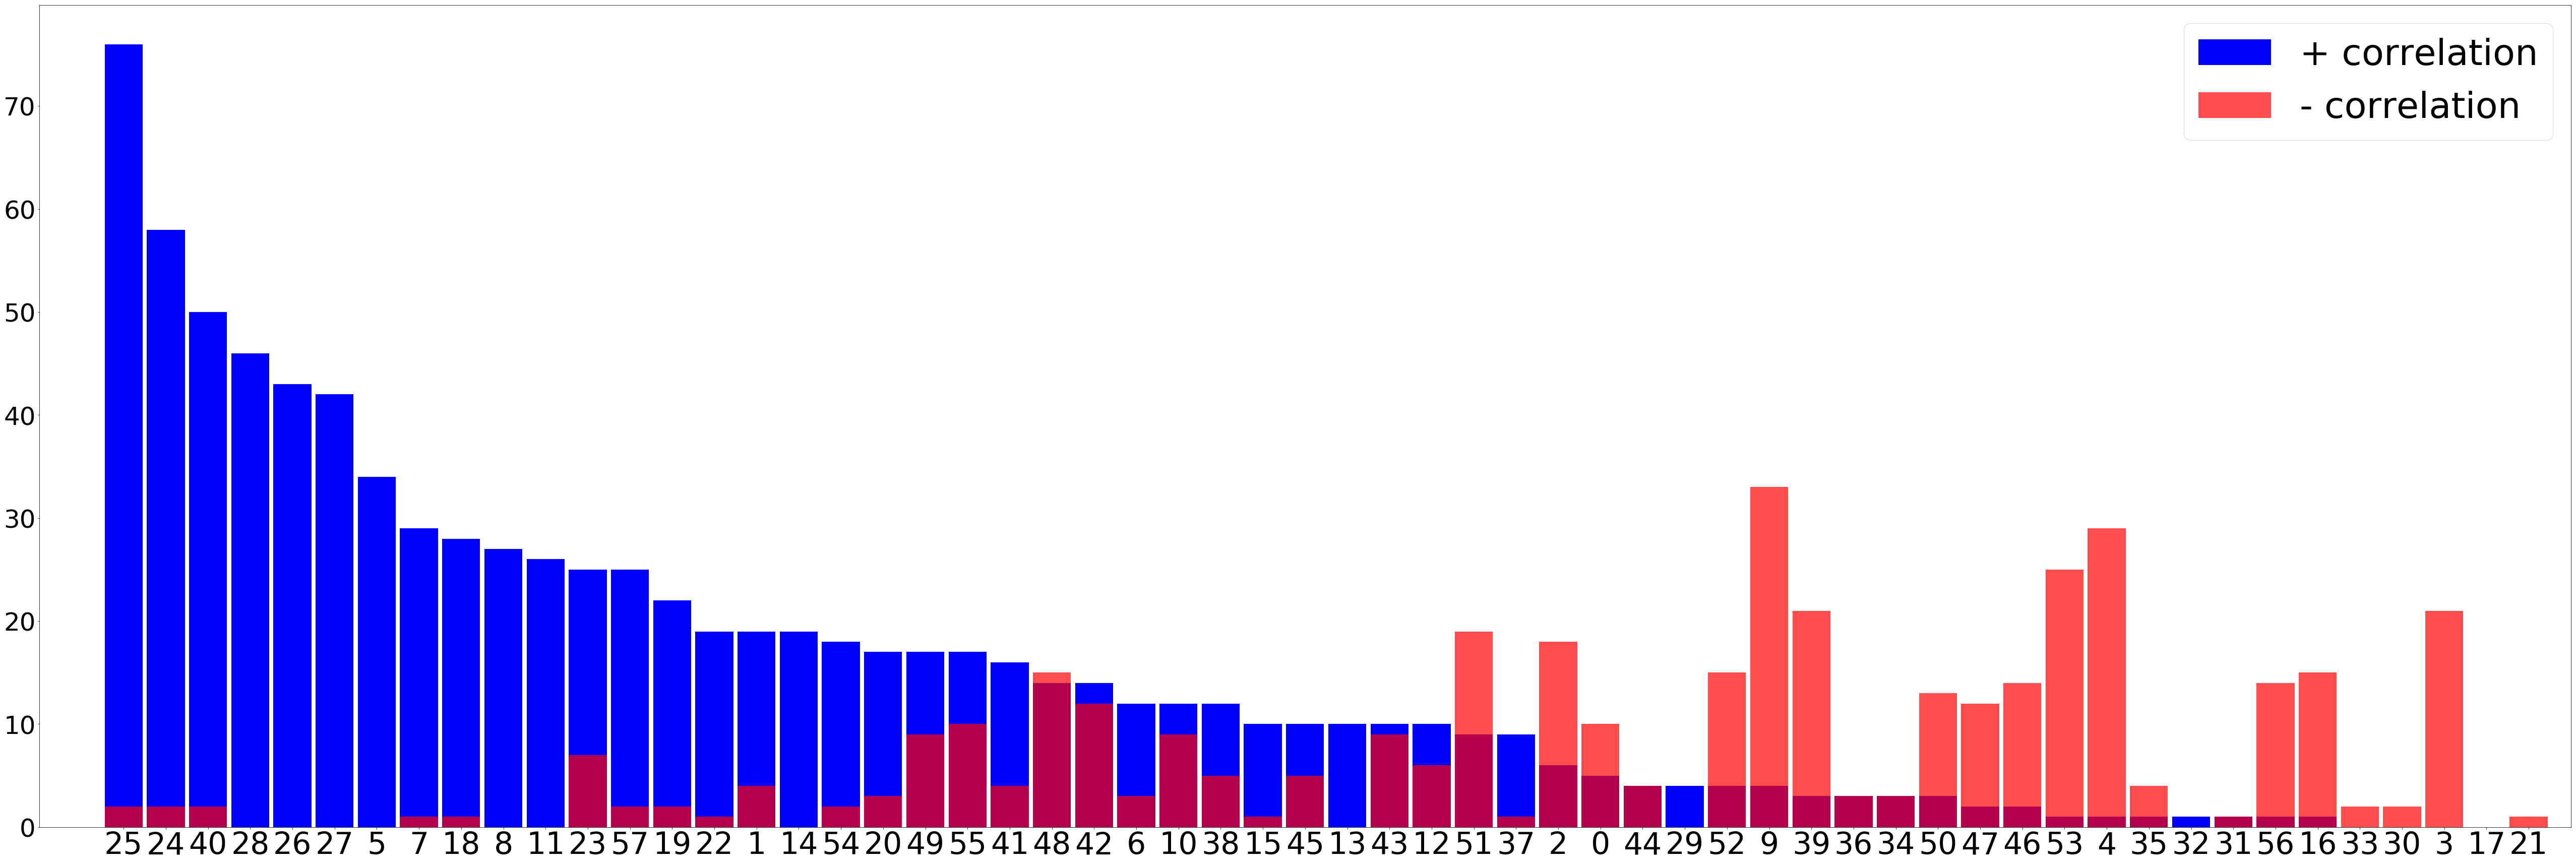

In [494]:
# from https://stackoverflow.com/questions/25550308/pyplot-bar-chart-of-positive-and-negative-values
x = np.arange(1,59)#range(7)

plt.figure(figsize=(90,30))

plt.bar(x, sorted_pos_count, width=0.9, color='b',label = '+ correlation')
plt.bar(x, sorted_neg_count, width=0.9, color='r', alpha =0.7, label = '- correlation')
#locs, labs = plt.xticks(np.arange(1,59)) 
plt.xticks(np.arange(1,59), x_labels, fontsize =6F0) 
#plt.ylabel('Number of Weeks \n (with weakly significant correlation)', fontsize = 60)
#plt.xlabel('Feature ID', fontsize= 60)
#plt.title('Features Correlated with Number of Shares Across Weeks \n  |r|>0.3, p<0.05', fontsize=80)
plt.yticks(fontsize= 50)
plt.xlim([-1, X_training.shape[1]+1])
plt.legend(fontsize = 72)

plt.figure(figsize=(50,20))
bins = np.arange(1,X_training.shape[1]+2)  - 0.5
plt.hist(sorted_pos_count,bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1), alpha = 0.7, color = 'b', label = '+ve correlation')
plt.hist(sorted_neg_count,bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1), alpha = 0.5, color = 'r', label= '-ve correlation')

plt.ylabel('Count', fontsize = 44)
plt.xlabel('Feature ID', fontsize= 44)
plt.title('Features significantly (|r|>0.3, p<0.05) correlated with number of shares', fontsize=52)
plt.xticks(sorted_pos_feats, fontsize= 32)
plt.yticks(fontsize= 32)
plt.xlim([-1, X_training.shape[1]+1])
plt.legend(fontsize = 44)

Text(0.5,1,'Features significantly (|r|>0.3, p<0.05) correlated with number of shares')

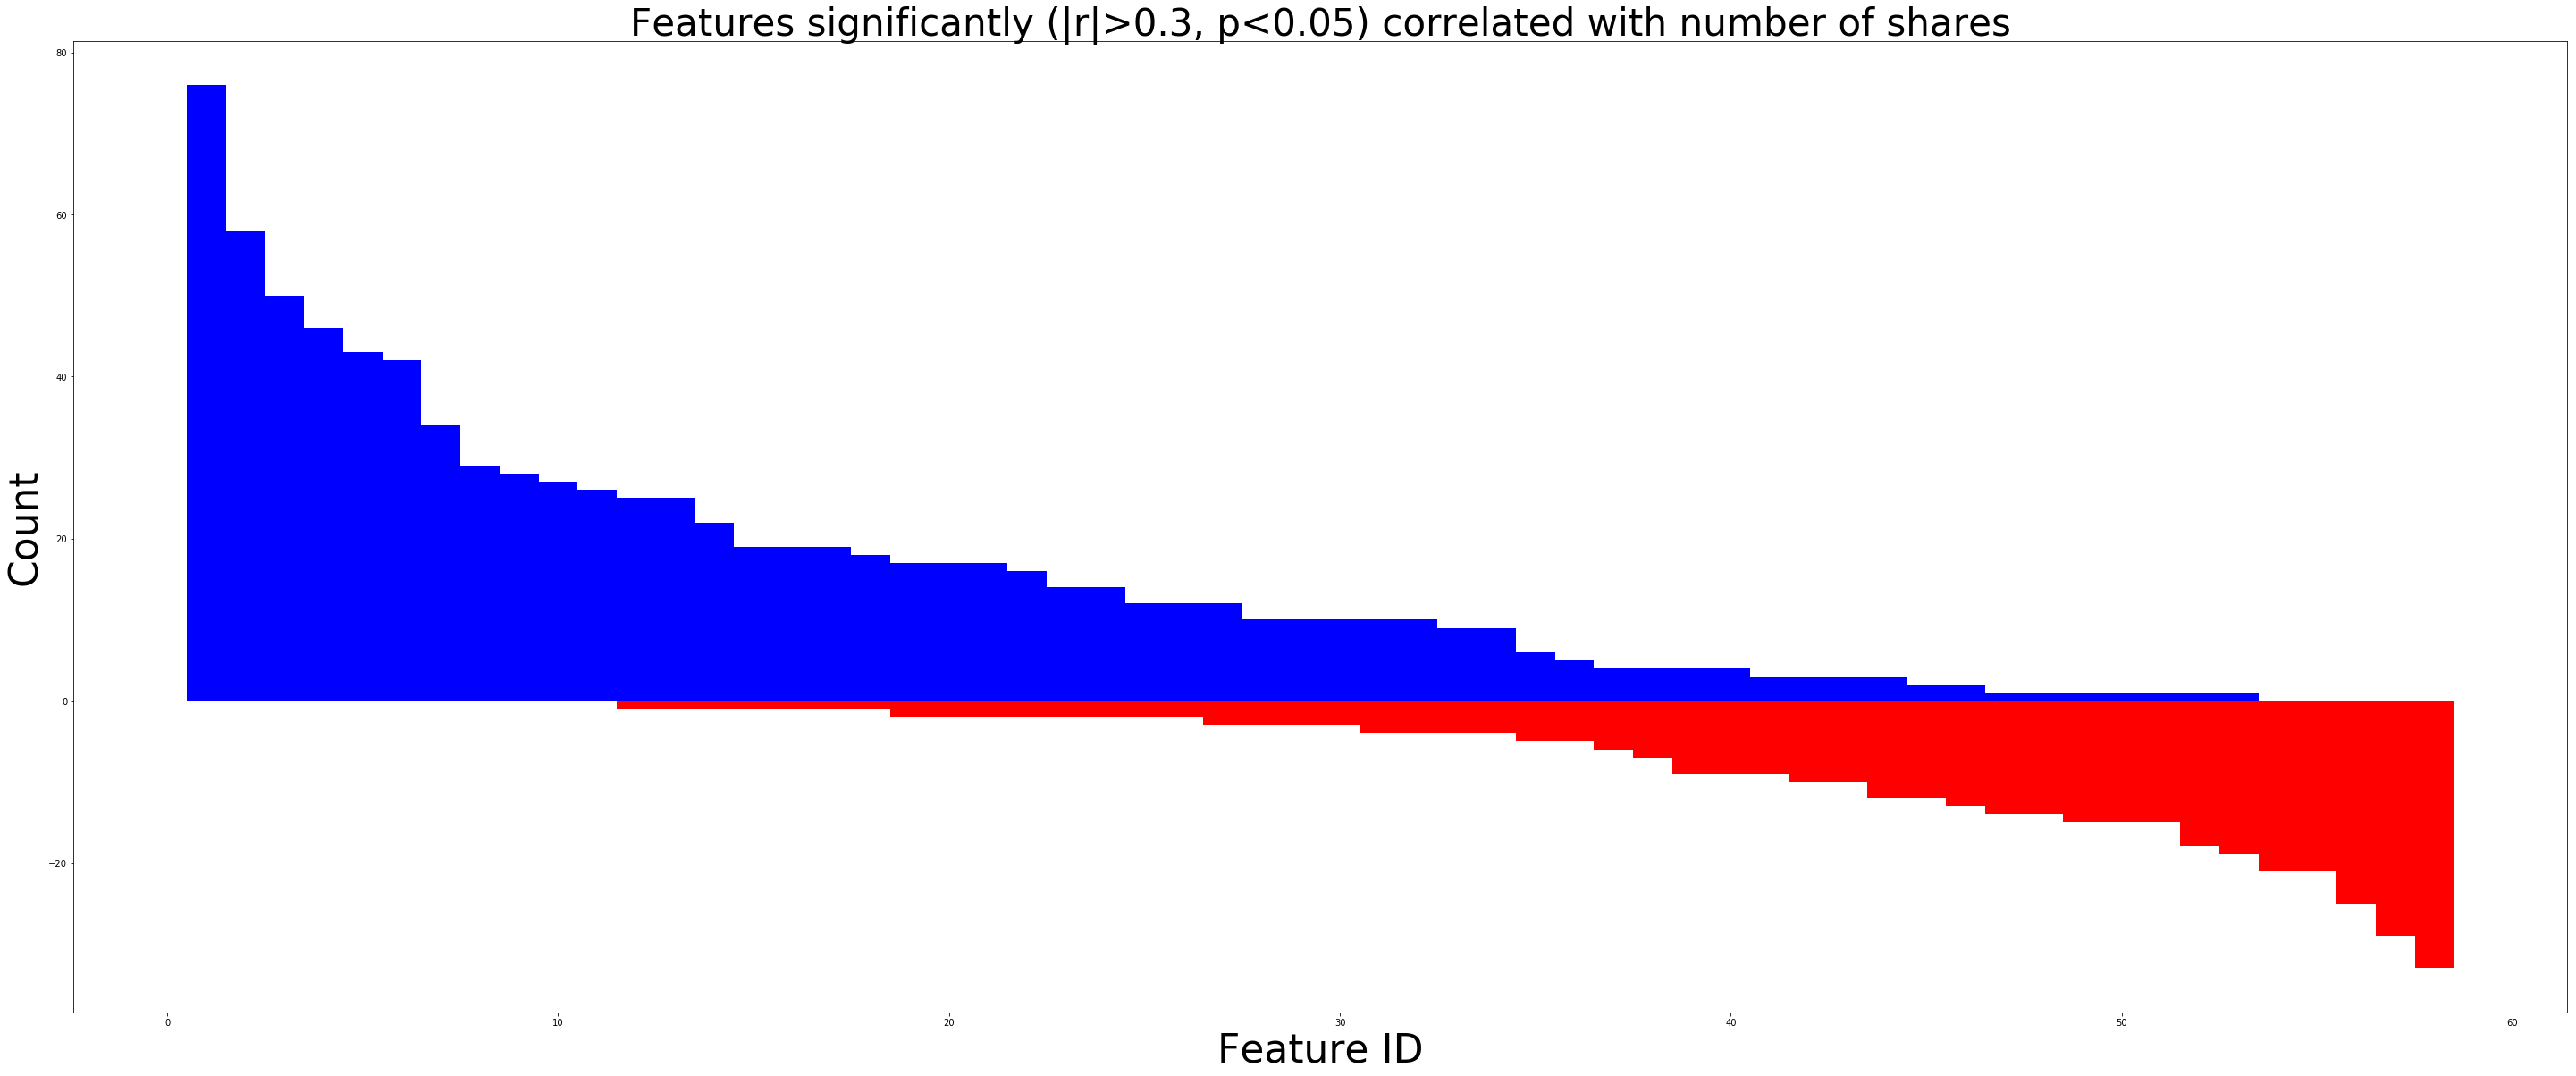

In [395]:
# from https://stackoverflow.com/questions/25550308/pyplot-bar-chart-of-positive-and-negative-values
x = np.arange(1,59)#range(7)
# negative_data = [-1,-4,-3,-2,-6,-2,-8]
# positive_data = [4,2,3,1,4,6,7,]

fig = plt.figure(figsize=(50,20))
ax = plt.subplot(111)
ax.bar(x, sorted_neg_count, width=1, color='r')
ax.bar(x, sorted_pos_count, width=1, color='b')
plt.ylabel('Count', fontsize = 44)
plt.xlabel('Feature ID', fontsize= 44)
plt.title('Features significantly (|r|>0.3, p<0.05) correlated with number of shares', fontsize=42)
plt.xticks(range(1,X_training.shape[1]+1), fontsize= 32)

In [336]:
np.sum(corr_weeks>0, axis =1).shape

(360,)

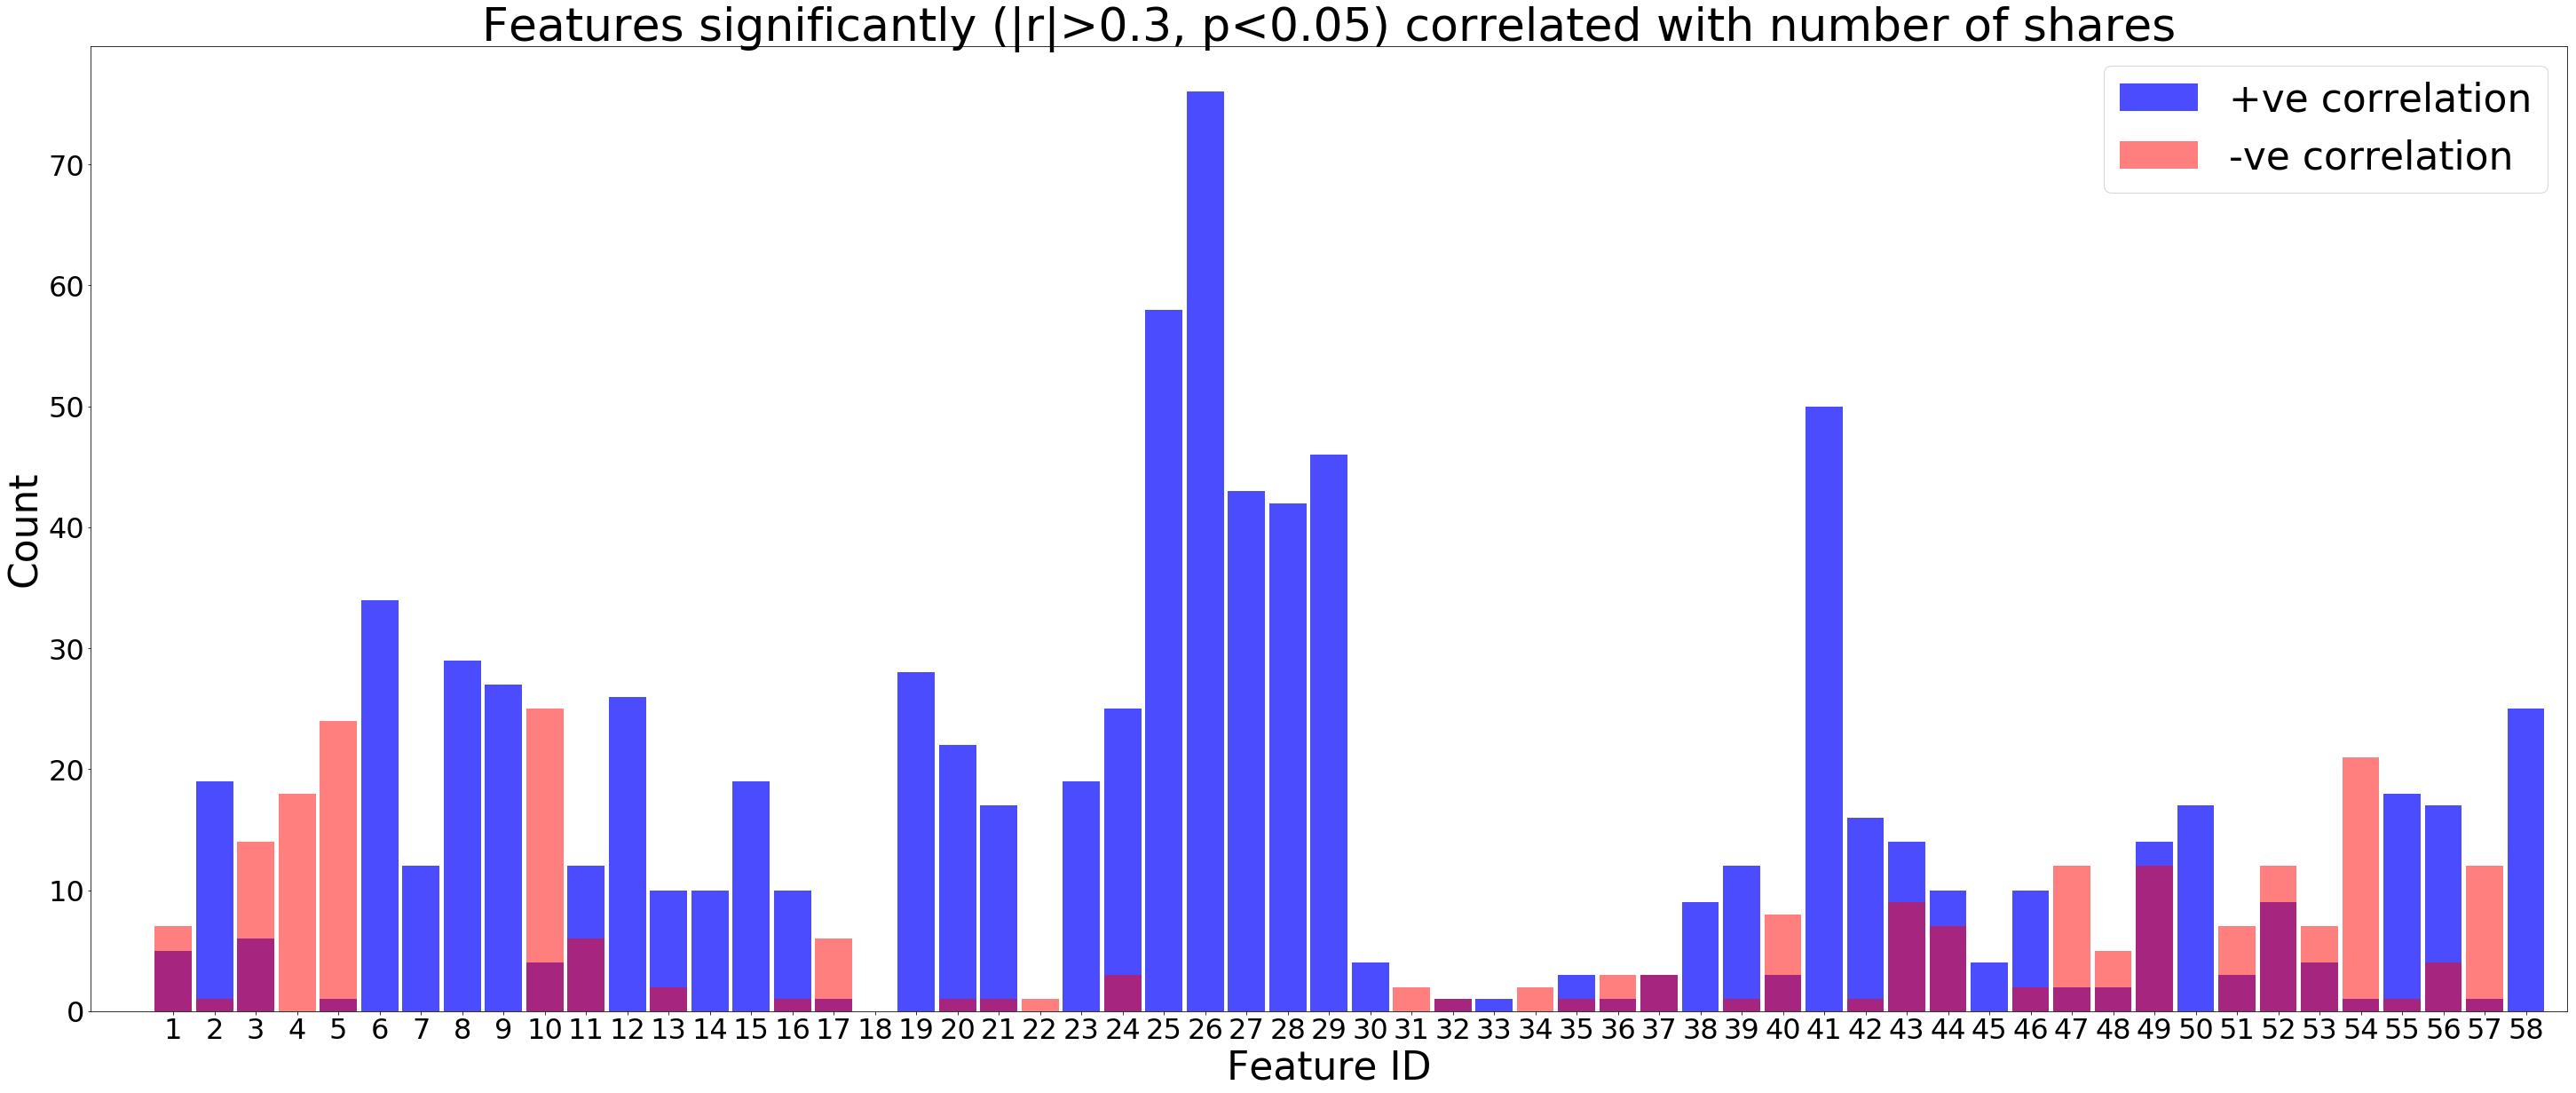

In [232]:
plt.figure(figsize=(50,20))
bins = np.arange(1,X_training.shape[1]+2)  - 0.5
plt.hist(pos_sig_feats,bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1), alpha = 0.7, color = 'b', label = '+ve correlation')
plt.hist(neg_sig_feats,bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1), alpha = 0.5, color = 'r', label= '-ve correlation')

plt.ylabel('Count', fontsize = 44)
plt.xlabel('Feature ID', fontsize= 44)
plt.title('Features significantly (|r|>0.3, p<0.05) correlated with number of shares', fontsize=52)
plt.xticks(range(1,X_training.shape[1]+1), fontsize= 32)
plt.yticks(fontsize= 32)
plt.xlim([-1, X_training.shape[1]+1])
plt.legend(fontsize = 44)

<Container object of 7 artists>

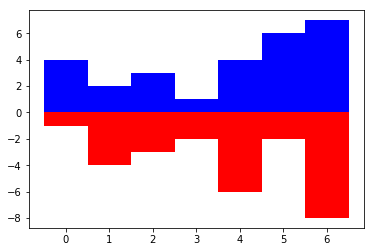

In [235]:
# from https://stackoverflow.com/questions/25550308/pyplot-bar-chart-of-positive-and-negative-values
x = range(7)
negative_data = [-1,-4,-3,-2,-6,-2,-8]
positive_data = [4,2,3,1,4,6,7,]

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, negative_data, width=1, color='r')
ax.bar(x, positive_data, width=1, color='b')

In [244]:
weeks = list(np.arange(1,59))

In [259]:
?np.argsort

In [264]:
type(sorted_pos_feats)

numpy.ndarray

In [266]:
sorted_pos_feats.shape

(855,)

In [268]:
pos_sig_feats = np.asarray(pos_sig_feats)

In [269]:
pos_sig_feats.shape

(855,)

In [271]:
test = np.array(pos_sig_feats).argsort()[:-len(pos_sig_feats)][::-1]

In [272]:
test

array([], dtype=int64)

In [270]:
pos_sig_feats[sorted_pos_feats]

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 17, 19

In [278]:
sorted_pos_feats = list(np.argsort(pos_sig_feats))
sorted_pos_feats

In [284]:
sorted_pos_feats.reverse()
sorted_pos_feats

[72,
 344,
 765,
 21,
 463,
 36,
 722,
 468,
 289,
 257,
 590,
 478,
 673,
 577,
 279,
 187,
 370,
 725,
 657,
 231,
 244,
 750,
 131,
 550,
 125,
 75,
 252,
 186,
 744,
 278,
 326,
 672,
 576,
 288,
 343,
 230,
 20,
 462,
 467,
 84,
 243,
 656,
 724,
 281,
 342,
 185,
 631,
 539,
 369,
 509,
 19,
 380,
 552,
 113,
 229,
 749,
 26,
 208,
 287,
 130,
 43,
 783,
 712,
 566,
 627,
 661,
 649,
 812,
 685,
 626,
 610,
 543,
 565,
 660,
 711,
 122,
 251,
 671,
 220,
 76,
 124,
 650,
 846,
 335,
 444,
 442,
 542,
 536,
 325,
 226,
 835,
 320,
 368,
 202,
 18,
 648,
 341,
 219,
 46,
 238,
 441,
 698,
 367,
 334,
 17,
 184,
 748,
 317,
 498,
 689,
 443,
 183,
 785,
 584,
 731,
 613,
 193,
 537,
 448,
 32,
 29,
 780,
 106,
 466,
 182,
 277,
 508,
 45,
 507,
 347,
 181,
 670,
 286,
 647,
 573,
 589,
 743,
 237,
 646,
 810,
 437,
 201,
 583,
 218,
 297,
 844,
 228,
 177,
 737,
 16,
 351,
 564,
 324,
 198,
 603,
 841,
 730,
 371,
 710,
 593,
 653,
 346,
 112,
 830,
 591,
 572,
 196,
 424,
 621,
 47

In [285]:
pos_sig_feats[sorted_pos_feats]

array([58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58,
       58, 58, 58, 58, 58, 58, 58, 58, 57, 56, 56, 56, 56, 56, 56, 56, 56,
       56, 56, 56, 56, 56, 56, 56, 56, 56, 55, 55, 55, 55, 55, 55, 55, 55,
       55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 54, 53, 53, 53, 53, 52, 52,
       52, 52, 52, 52, 52, 52, 52, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49, 49, 49, 48, 48, 47, 47, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 46, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44,
       44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42,
       42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 39,
       39, 39, 39, 39, 39

In [255]:
np.asarray(pos_sig_feats).max()

58

In [258]:
np.asarray(pos_sig_feats)

array([ 2, 25, 26, 12, 21, 24, 41, 12, 25, 26,  6, 15, 38, 25, 26, 41, 43,
       49, 50, 55, 56, 58,  2,  6,  8, 12, 55,  1,  9, 46,  3,  5, 46, 12,
       25, 26, 58, 23,  8,  9, 12, 41, 41, 55, 41, 44, 49,  6,  8, 21, 24,
       25, 26, 41,  8, 11, 12, 19, 20, 25, 26, 41, 19, 20, 25, 26, 12, 27,
       25, 26, 41,  2, 58, 16,  9, 57, 50,  2,  1,  2,  6,  9,  6,  8, 56,
        1, 30,  6, 12, 19, 20, 30, 35, 37, 11, 25, 27, 41, 23, 41,  2, 15,
       19, 38,  8, 41, 46,  9, 23, 41,  6, 12, 42, 55, 27, 29,  8, 28, 29,
       26,  6,  9, 51,  6, 50, 58,  6, 11, 19, 25, 55, 58, 16, 25, 26,  6,
       15, 35, 37,  8, 24, 26, 41, 15, 19, 20, 25, 26, 27, 19, 20, 24, 25,
       26, 12,  6, 28, 28, 29, 25, 26, 28, 29, 41, 25, 26, 12,  9, 12,  7,
       26, 14, 38, 27, 13, 24, 26, 43, 19, 20, 39, 44, 45, 47, 49, 55, 56,
       58, 12, 16, 27, 29, 40, 46,  6, 16, 42, 40, 42, 25, 39, 43, 50, 25,
       26, 27, 28, 29, 55,  8, 21, 23,  8, 12, 25, 27, 28, 29, 43, 49, 50,
       25, 25, 26, 13, 39

In [249]:
sorted_pos_feats

array([796,  27,  85, 524,  78,   0, 249, 525, 823, 693,  22, 479, 806,
       100,  79,  71, 514, 258,  77, 574, 429, 544, 318, 305, 319, 723,
        30, 348, 275, 847,  31, 480, 486, 155, 726, 135, 126, 110, 395,
       120,  87,  82,  80, 306, 545, 123, 721, 271, 423, 635, 517,  47,
        23, 824,  10, 665, 515, 290, 353, 194, 688, 814, 829, 253, 327,
       614, 328, 169, 322, 469, 558, 747, 267, 242, 503, 727, 825, 578,
       212, 116, 294, 209, 815, 851, 104, 404, 364, 265, 522, 360, 445,
       628, 431, 464,  24, 487,  38, 330, 807, 139, 245,  54,  83, 786,
        48, 272, 753, 752, 167, 690, 454, 620,  28, 121, 559, 540, 848,
       449, 458, 773, 314,  39, 551, 666, 546, 331,  81, 518, 784, 291,
        74, 403, 107, 553, 488, 585, 362, 415, 708, 728, 475, 827, 595,
        55, 826,  94, 504, 250, 127, 213, 629, 510, 188, 166, 667, 168,
        40, 422, 575,  33, 440, 261, 154, 282, 323, 268, 599,   3, 111,
        88,   7,  66,  56,  25, 481, 248, 766, 541, 365, 349, 48

In [242]:
np.sort(pos_sig_feats)

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 17, 19

In [236]:
pos_sig_feats

[2,
 25,
 26,
 12,
 21,
 24,
 41,
 12,
 25,
 26,
 6,
 15,
 38,
 25,
 26,
 41,
 43,
 49,
 50,
 55,
 56,
 58,
 2,
 6,
 8,
 12,
 55,
 1,
 9,
 46,
 3,
 5,
 46,
 12,
 25,
 26,
 58,
 23,
 8,
 9,
 12,
 41,
 41,
 55,
 41,
 44,
 49,
 6,
 8,
 21,
 24,
 25,
 26,
 41,
 8,
 11,
 12,
 19,
 20,
 25,
 26,
 41,
 19,
 20,
 25,
 26,
 12,
 27,
 25,
 26,
 41,
 2,
 58,
 16,
 9,
 57,
 50,
 2,
 1,
 2,
 6,
 9,
 6,
 8,
 56,
 1,
 30,
 6,
 12,
 19,
 20,
 30,
 35,
 37,
 11,
 25,
 27,
 41,
 23,
 41,
 2,
 15,
 19,
 38,
 8,
 41,
 46,
 9,
 23,
 41,
 6,
 12,
 42,
 55,
 27,
 29,
 8,
 28,
 29,
 26,
 6,
 9,
 51,
 6,
 50,
 58,
 6,
 11,
 19,
 25,
 55,
 58,
 16,
 25,
 26,
 6,
 15,
 35,
 37,
 8,
 24,
 26,
 41,
 15,
 19,
 20,
 25,
 26,
 27,
 19,
 20,
 24,
 25,
 26,
 12,
 6,
 28,
 28,
 29,
 25,
 26,
 28,
 29,
 41,
 25,
 26,
 12,
 9,
 12,
 7,
 26,
 14,
 38,
 27,
 13,
 24,
 26,
 43,
 19,
 20,
 39,
 44,
 45,
 47,
 49,
 55,
 56,
 58,
 12,
 16,
 27,
 29,
 40,
 46,
 6,
 16,
 42,
 40,
 42,
 25,
 39,
 43,
 50,
 25,
 26,
 27,
 28,
 29,


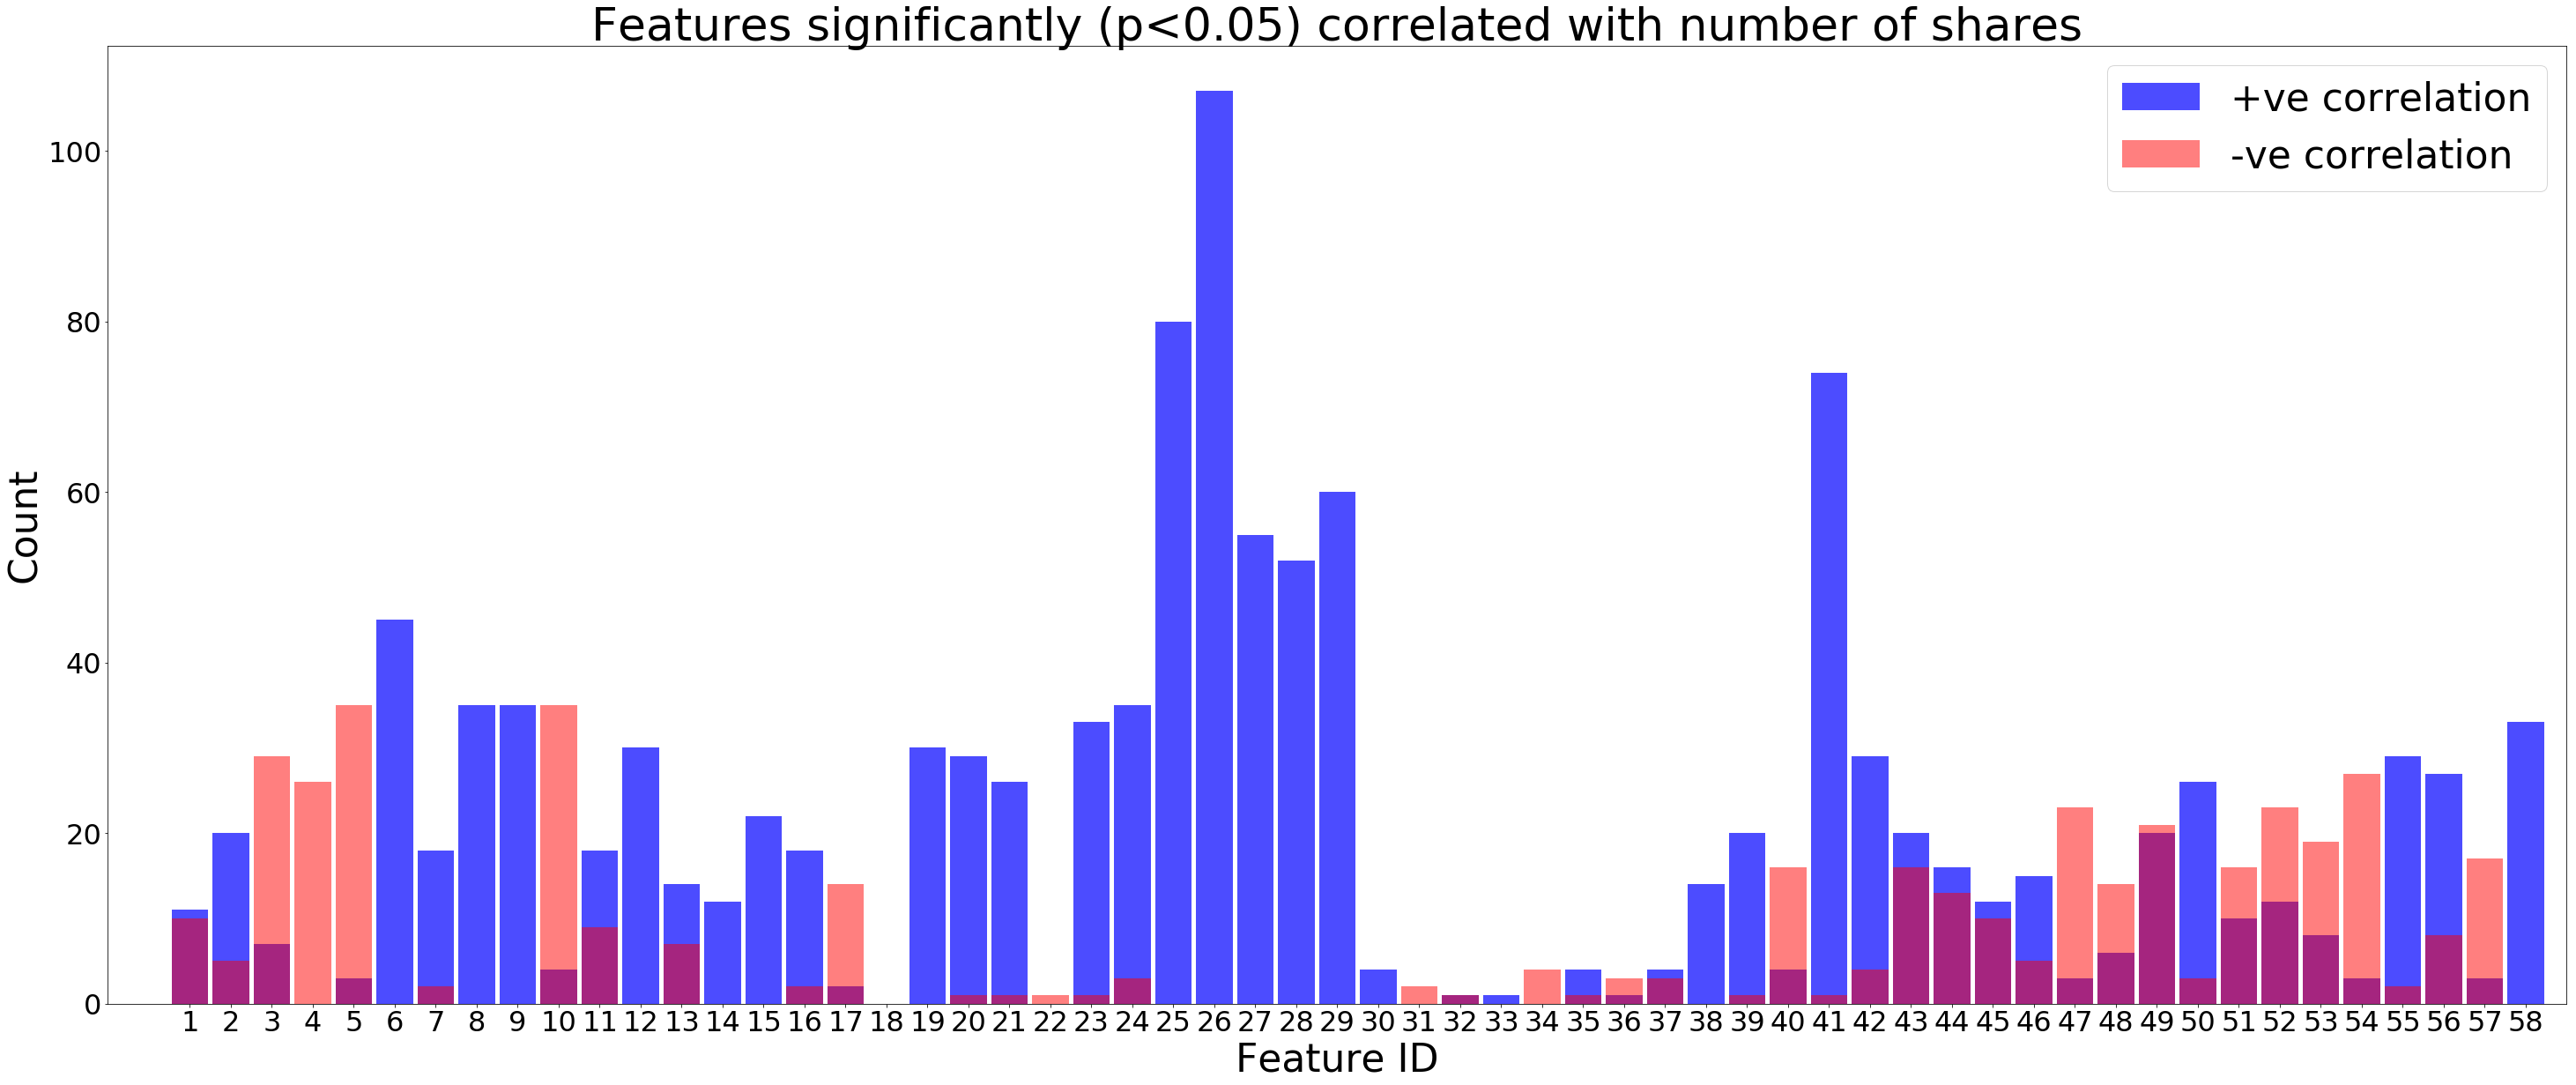

In [228]:
plt.figure(figsize=(50,20))
bins = np.arange(1,X_training.shape[1]+2)  - 0.5
plt.hist(pos_sig_feats,bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1), alpha = 0.7, color = 'b', label = '+ve correlation')
plt.hist(neg_sig_feats,bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1), alpha = 0.5, color = 'r', label= '-ve correlation')

plt.ylabel('Count', fontsize = 44)
plt.xlabel('Feature ID', fontsize= 44)
plt.title('Features significantly (p<0.05) correlated with number of shares', fontsize=52)
plt.xticks(range(1,X_training.shape[1]+1), fontsize= 32)
plt.yticks(fontsize= 32)
plt.xlim([-1, X_training.shape[1]+1])
plt.legend(fontsize = 44)

(-1, 59)

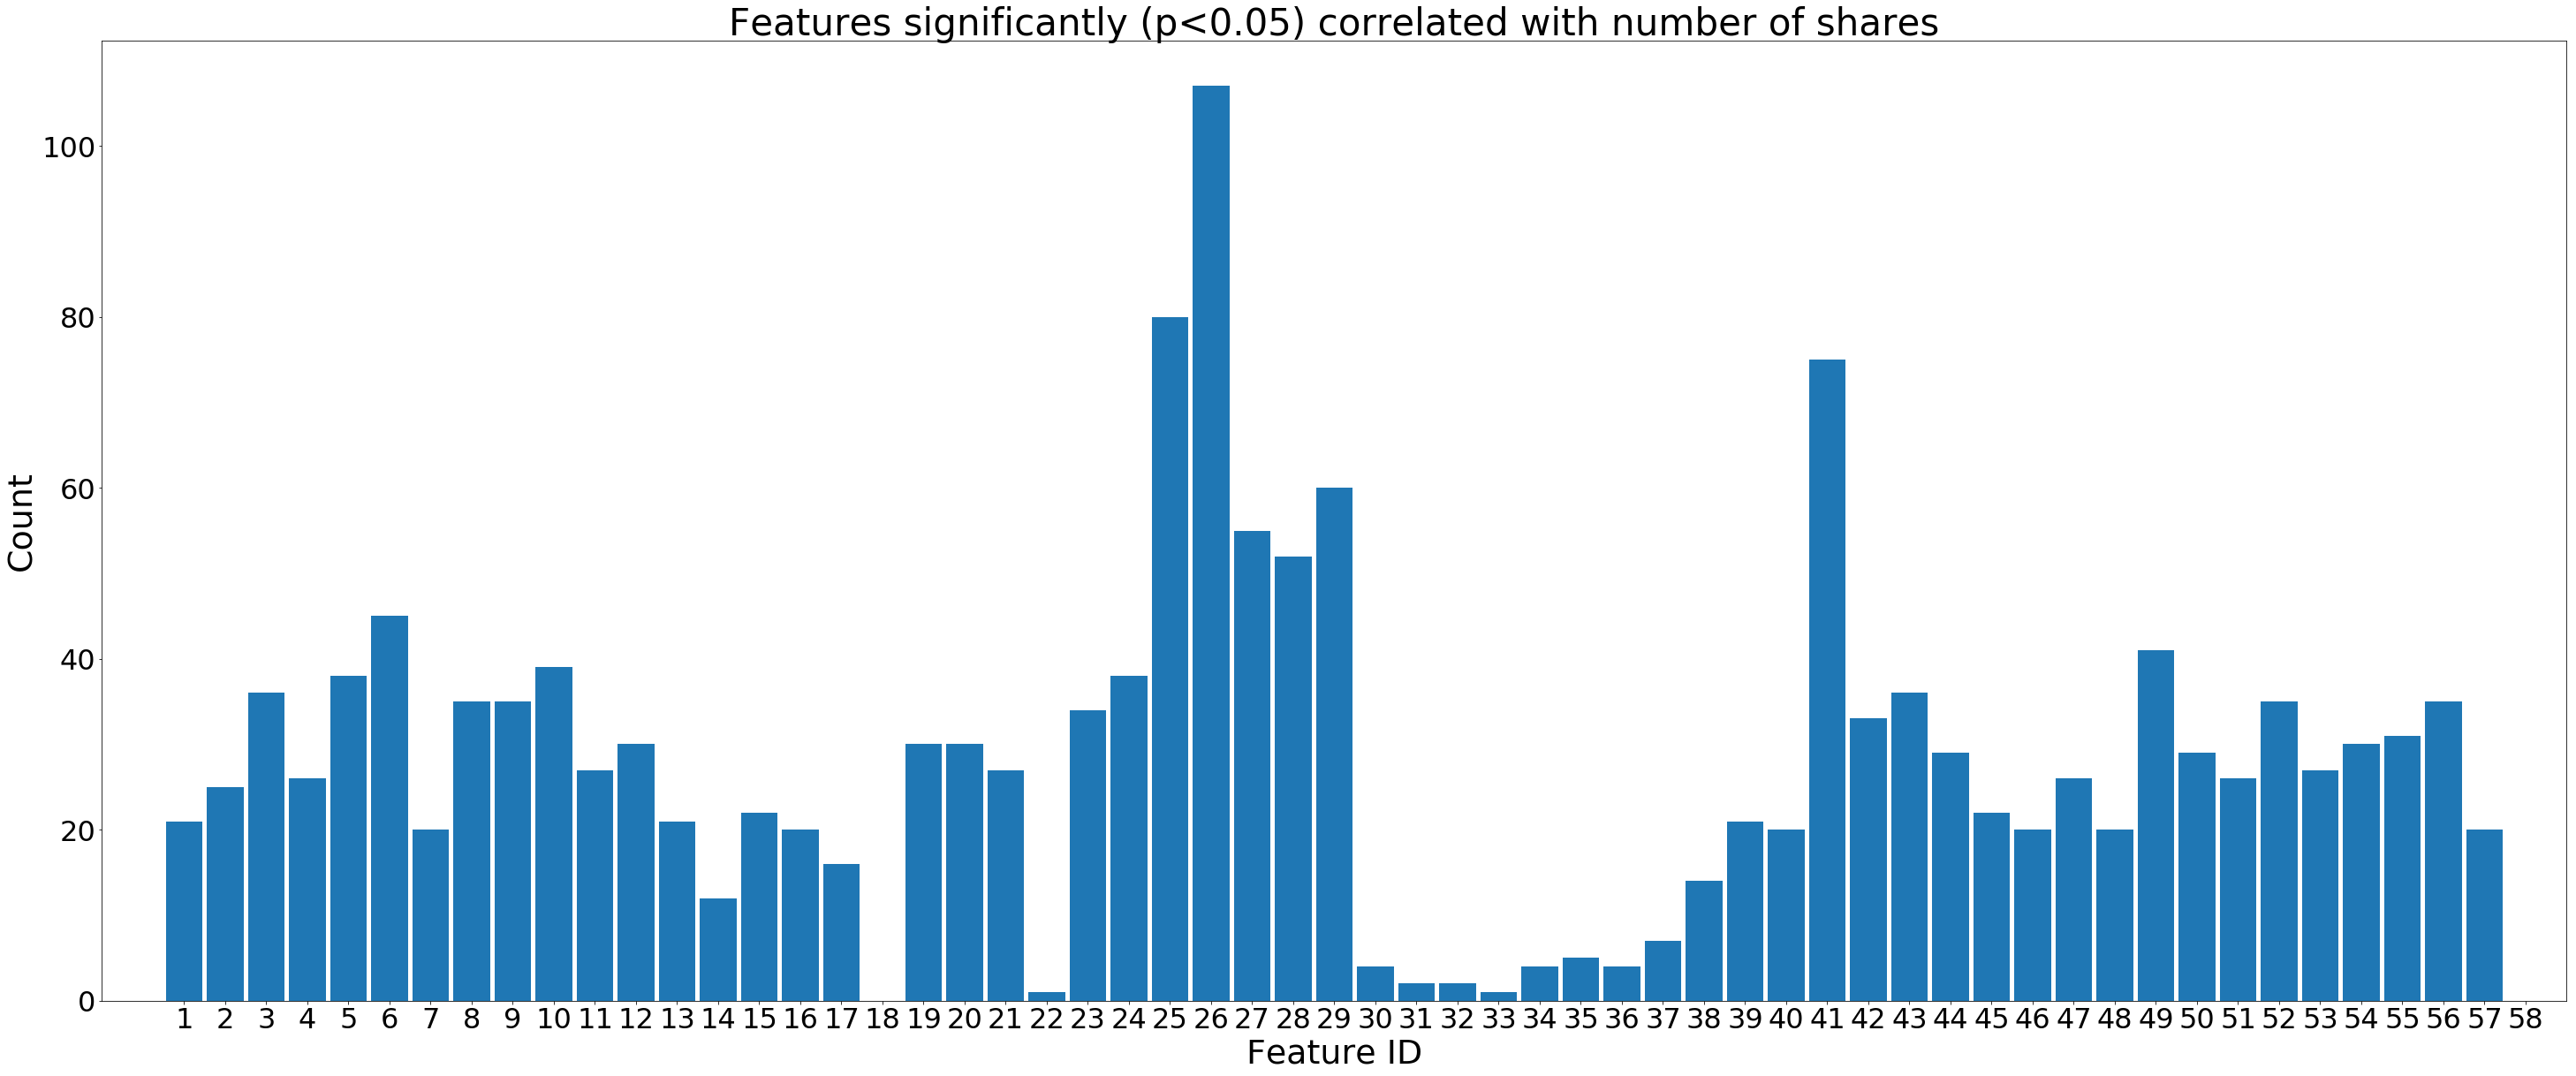

In [213]:
plt.figure(figsize=(50,20))
bins = np.arange(1,X_training.shape[1]+1)  - 0.5
plt.hist(sig_feats, bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1))
plt.ylabel('Count', fontsize = 38)
plt.xlabel('Feature ID', fontsize= 38)
plt.title('Features significantly (p<0.05) correlated with number of shares', fontsize=42)
plt.xticks(range(1,X_training.shape[1]+1), fontsize= 32)
plt.yticks(fontsize= 32)
plt.xlim([-1, X_training.shape[1]+1])

(-1, 59)

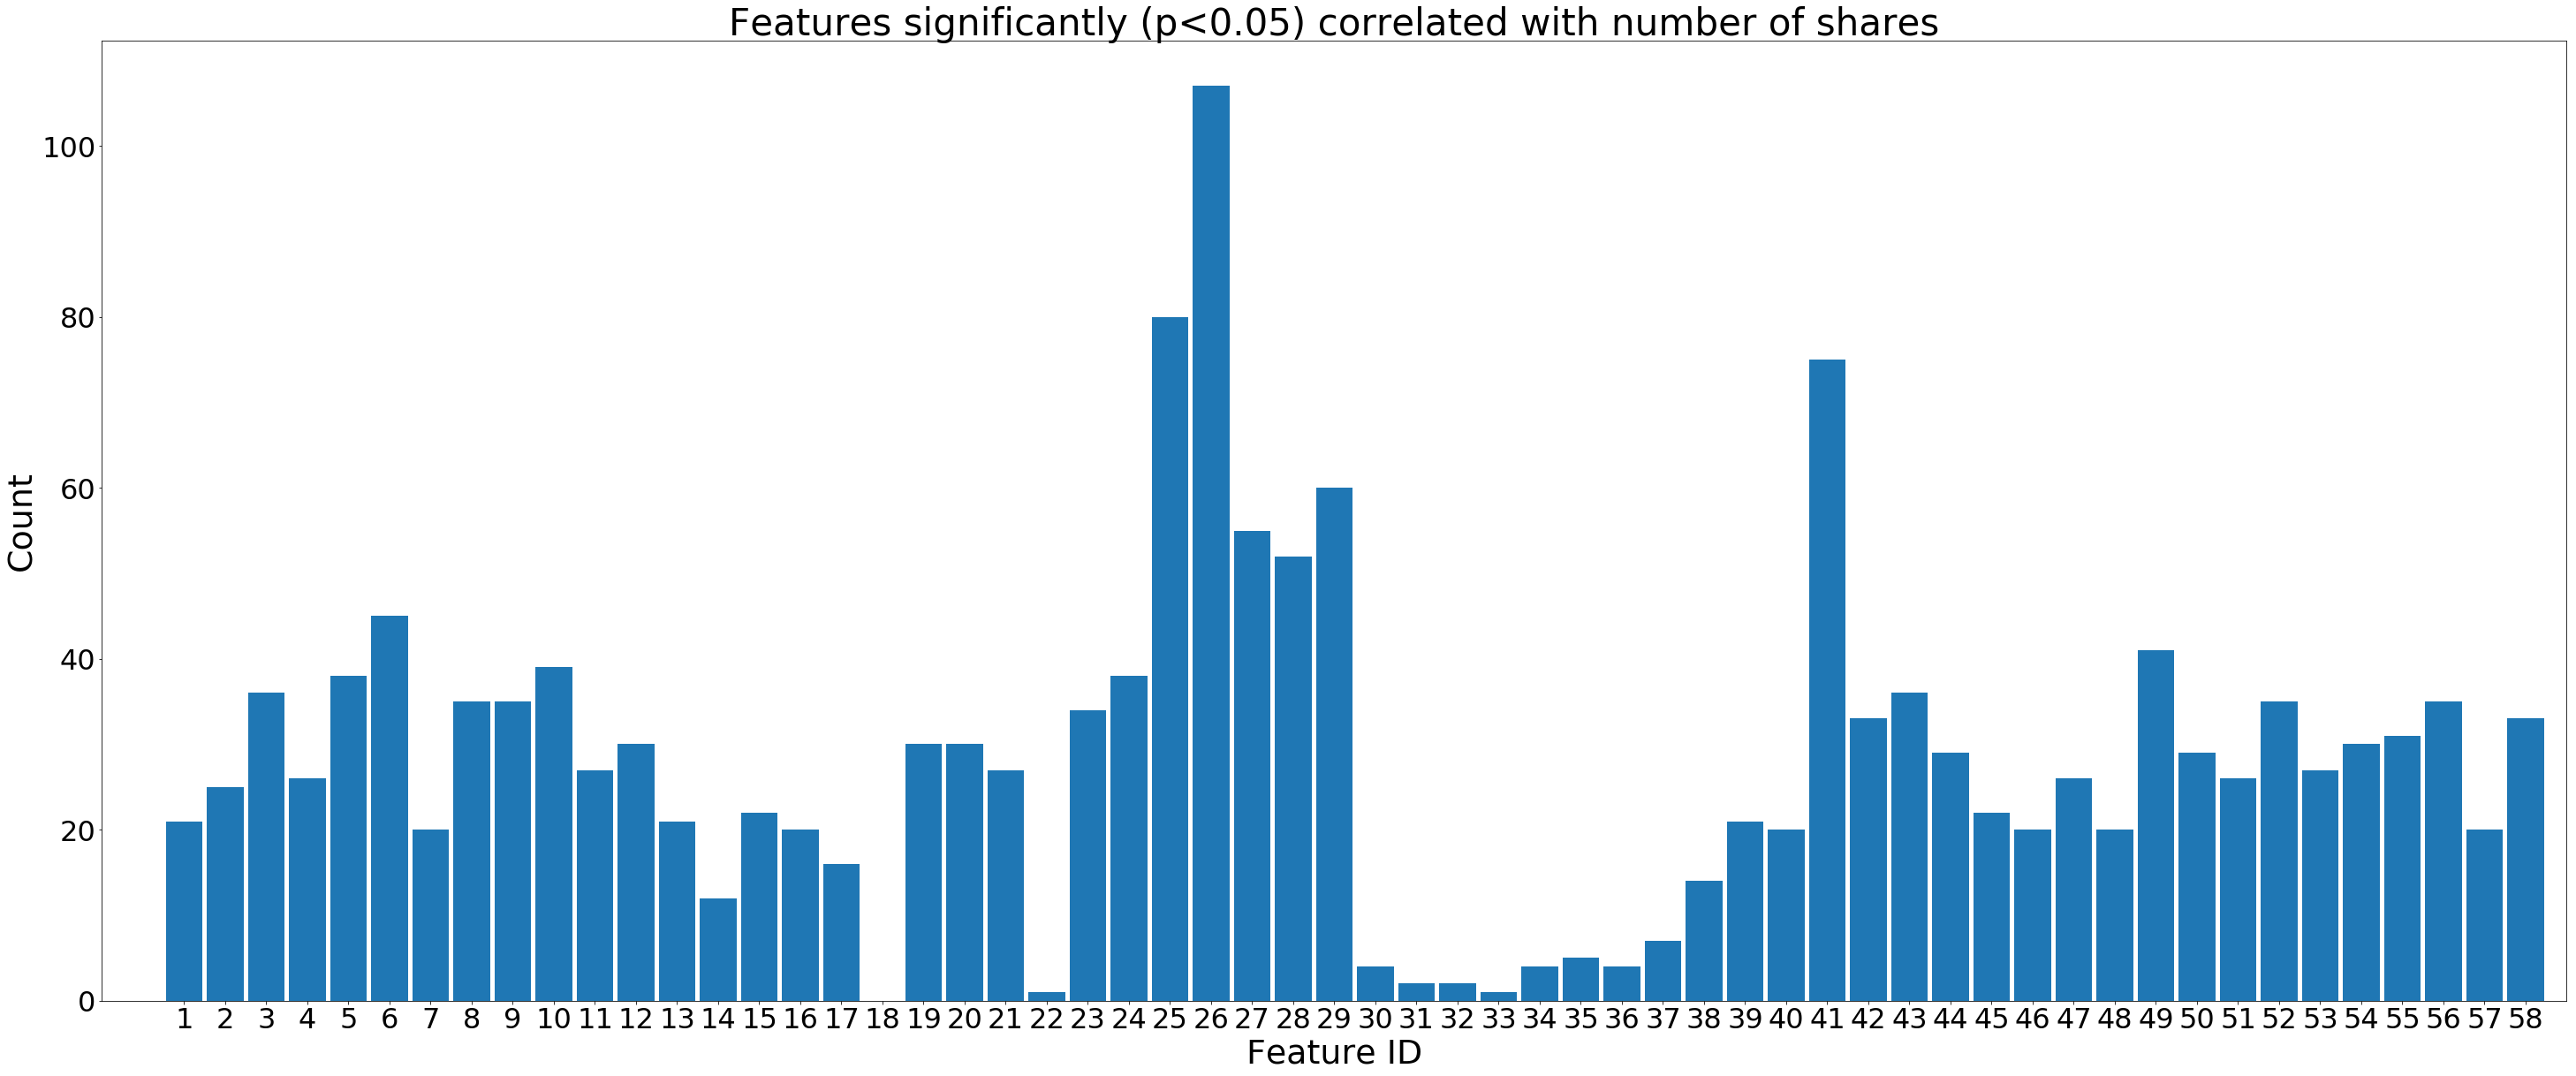

In [212]:
plt.figure(figsize=(50,20))
bins = np.arange(1,X_training.shape[1]+2)  - 0.5
plt.hist(sig_feats, bins = bins, rwidth=0.9, range=(1,X_training.shape[1]+1))
plt.ylabel('Count', fontsize = 38)
plt.xlabel('Feature ID', fontsize= 38)
plt.title('Features significantly (p<0.05) correlated with number of shares', fontsize=42)
plt.xticks(range(1,X_training.shape[1]+1), fontsize= 32)
plt.yticks(fontsize= 32)
plt.xlim([-1, X_training.shape[1]+1])

In [234]:
week_ys

{1: array([ 8400.,  2000.,  1200.,  4200.,  2200.,  1700.,  1900.,  1700.,
          987.,  1400.,  4800.,   867.,  1200., 26600.,  1900.,  2200.,
         1100.,  2800.,   948.,  1700.,  3700.,  2000., 16000.,  1000.]),
 2: array([16900.,  9500.,  1600.,  1900.,  1100.,  1400.,  1200.,  1600.,
         1700., 15000.,  1300.,  5500.,  3900.,  2900.,  1100.,  3400.,
         7900.,  1800., 11700.,  4000., 27500.,  1100.]),
 3: array([   776., 208300.,   1900.,  69300.,    805.,   3100.,    674.,
          1400.,    925.,   5200.,   8600.,   1400.,   2000.,    833.,
          3100.,   1400.,    646.,    954.,    922.,   9800.,   7800.,
         12900.,   1300.,   3600.,   1900.,    900.,   2100.,  26600.,
          2400.,    587.,    980.,   1000.,    877.,   2400.,    852.,
           813.,   6000.,    788.,    821.,   4600.,    760.,   3000.,
           768.,    553.,   2900.,   6800.,   1500.,   1100.,   9000.,
           775.,    829.,   1300.,   1300.,    682.,   1300.,   2300.,
   

## FIN.